---
format:
  html:
    embed-resources: true
---

In [66]:
API_KEY='396dd8714fbc4b4fa24b537d26e3879e'

In [2]:
import requests
import json
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [6]:
baseURL = "https://newsapi.org/v2/everything?"
total_requests=2
verbose=True
TOPIC='Disney'

In [69]:
def FormURL(TOPIC):
    URLpost = {'apiKey': API_KEY,
               'q': '+'+TOPIC,
               'sortBy': 'relevancy',
               'totalRequests': 1}

# print(baseURL)
# print(URLpost)

#GET DATA FROM API
    response = requests.get(baseURL, URLpost) #request data from the server
# print(response.url);  
    response = response.json() #extract txt data from request into json
    return(response)
# PRETTY PRINT
# https://www.digitalocean.com/community/tutorials/python-pretty-print-json

# print(json.dumps(response, indent=2))

# #GET TIMESTAMP FOR PULL REQUEST
    
    # timestamp = datetime.now().strftime("%Y-%m-%d-H%H-M%M-S%S")

# SAVE TO FILE 
# with open(timestamp+'-newapi-raw-data.json', 'w') as outfile:
    # json.dump(response, outfile, indent=4)


In [4]:
def string_cleaner(input_string):
    try: 
        out=re.sub(r"""
                    [,.;@#?!&$-]+  # Accept one or more copies of punctuation
                    \ *           # plus zero or more copies of a space,
                    """,
                    " ",          # and replace it with a single space
                    input_string, flags=re.VERBOSE)

        #REPLACE SELECT CHARACTERS WITH NOTHING
        out = re.sub('[’.]+', '', input_string)

        #ELIMINATE DUPLICATE WHITESPACES USING WILDCARDS
        out = re.sub(r'\s+', ' ', out)

        #CONVERT TO LOWER CASE
        out=out.lower()
    except:
        print("ERROR")
        out=''
    return out

In [71]:
def CleanJSON(response, TOPIC):    
    article_list=response['articles']   #list of dictionaries for each article
    article_keys=article_list[0].keys()
#print("AVAILABLE KEYS:")
#print(article_keys)
    #index=0
    cleaned_data=[];  
    text_description = [];
    for article in article_list:
        tmp=[]

        for key in article_keys:

        # if(key=='source'):
        #     src=string_cleaner(article[key]['name'])
        #     tmp.append(src) 

        # if(key=='author'):
        #     author=string_cleaner(article[key])
            #ERROR CHECK (SOMETIMES AUTHOR IS SAME AS PUBLICATION)
        #     if(src in author): 
        #         print(" AUTHOR ERROR:",author);author='NA'
        #     tmp.append(author)

            if(key=='title'):
                text_description.append(string_cleaner(article[key]))

            if(key=='description'):
                text_description.append(string_cleaner(article[key]))

            if(key=='content'):
                tmp.append(string_cleaner(article[key]))
            
        # if(key=='publishedAt'):
            #DEFINE DATA PATERN FOR RE TO CHECK  .* --> wildcard
        #     ref = re.compile('.*-.*-.*T.*:.*:.*Z')
        #     date=article[key]
        #     if(not ref.match(date)):
        #         print(" DATE ERROR:",date); date="NA"
        #     tmp.append(date)
        
        # index += 1
        cleaned_data.append(tmp)
        df = pd.DataFrame(cleaned_data)
        #print(df)
        #print(cleaned_data)
        #print(text_description)
        df.to_csv(TOPIC+'_cleaned_news.csv', index=False)
        return text_description, cleaned_data

In [7]:
import wikipedia
with open(TOPIC+"_cleaned_wiki.txt", "w") as file:
    file.write(wikipedia.summary(TOPIC))

im a disney adult, and i dont care who knows it i live in disney t-shirts, i was nearly a friend of tinker bell (thats a euphemism for playing a character in the parks), i have been to disney world … [+10007 chars]
[['im a disney adult, and i dont care who knows it i live in disney t-shirts, i was nearly a friend of tinker bell (thats a euphemism for playing a character in the parks), i have been to disney world … [+10007 chars]'], ['im a disney adult, and i dont care who knows it i live in disney t-shirts, i was nearly a friend of tinker bell (thats a euphemism for playing a character in the parks), i have been to disney world … [+10007 chars]'], ['im a disney adult, and i dont care who knows it i live in disney t-shirts, i was nearly a friend of tinker bell (thats a euphemism for playing a character in the parks), i have been to disney world … [+10007 chars]'], ['im a disney adult, and i dont care who knows it i live in disney t-shirts, i was nearly a friend of tinker bell (thats a e

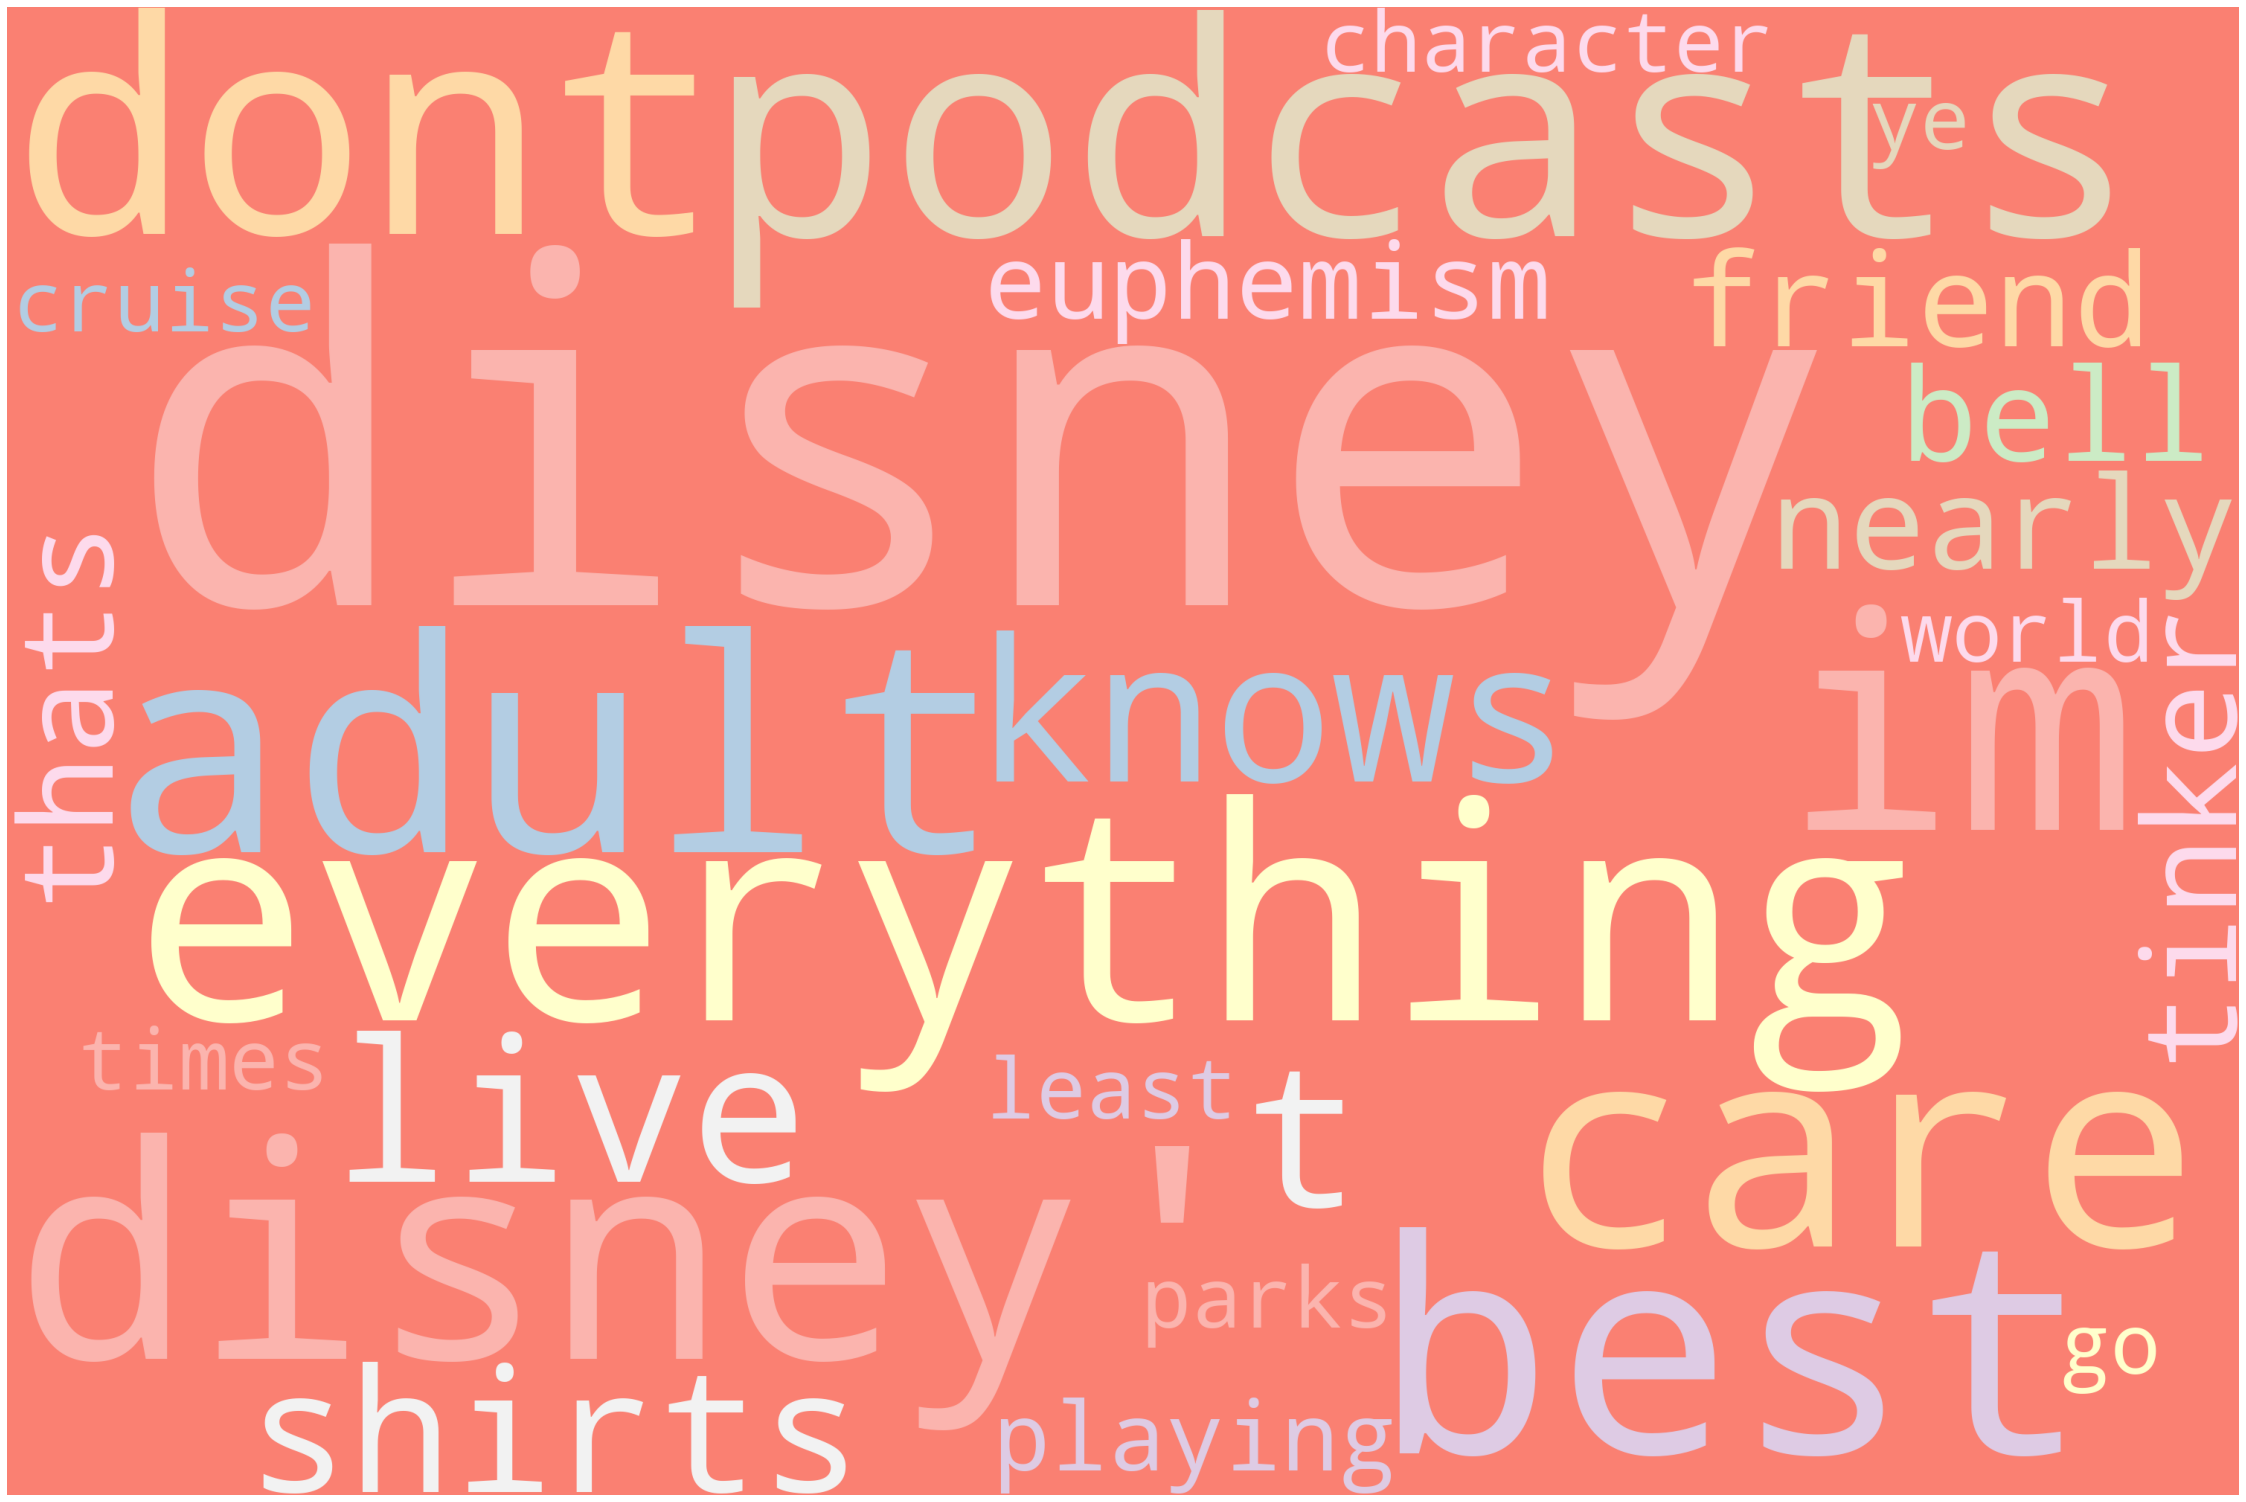

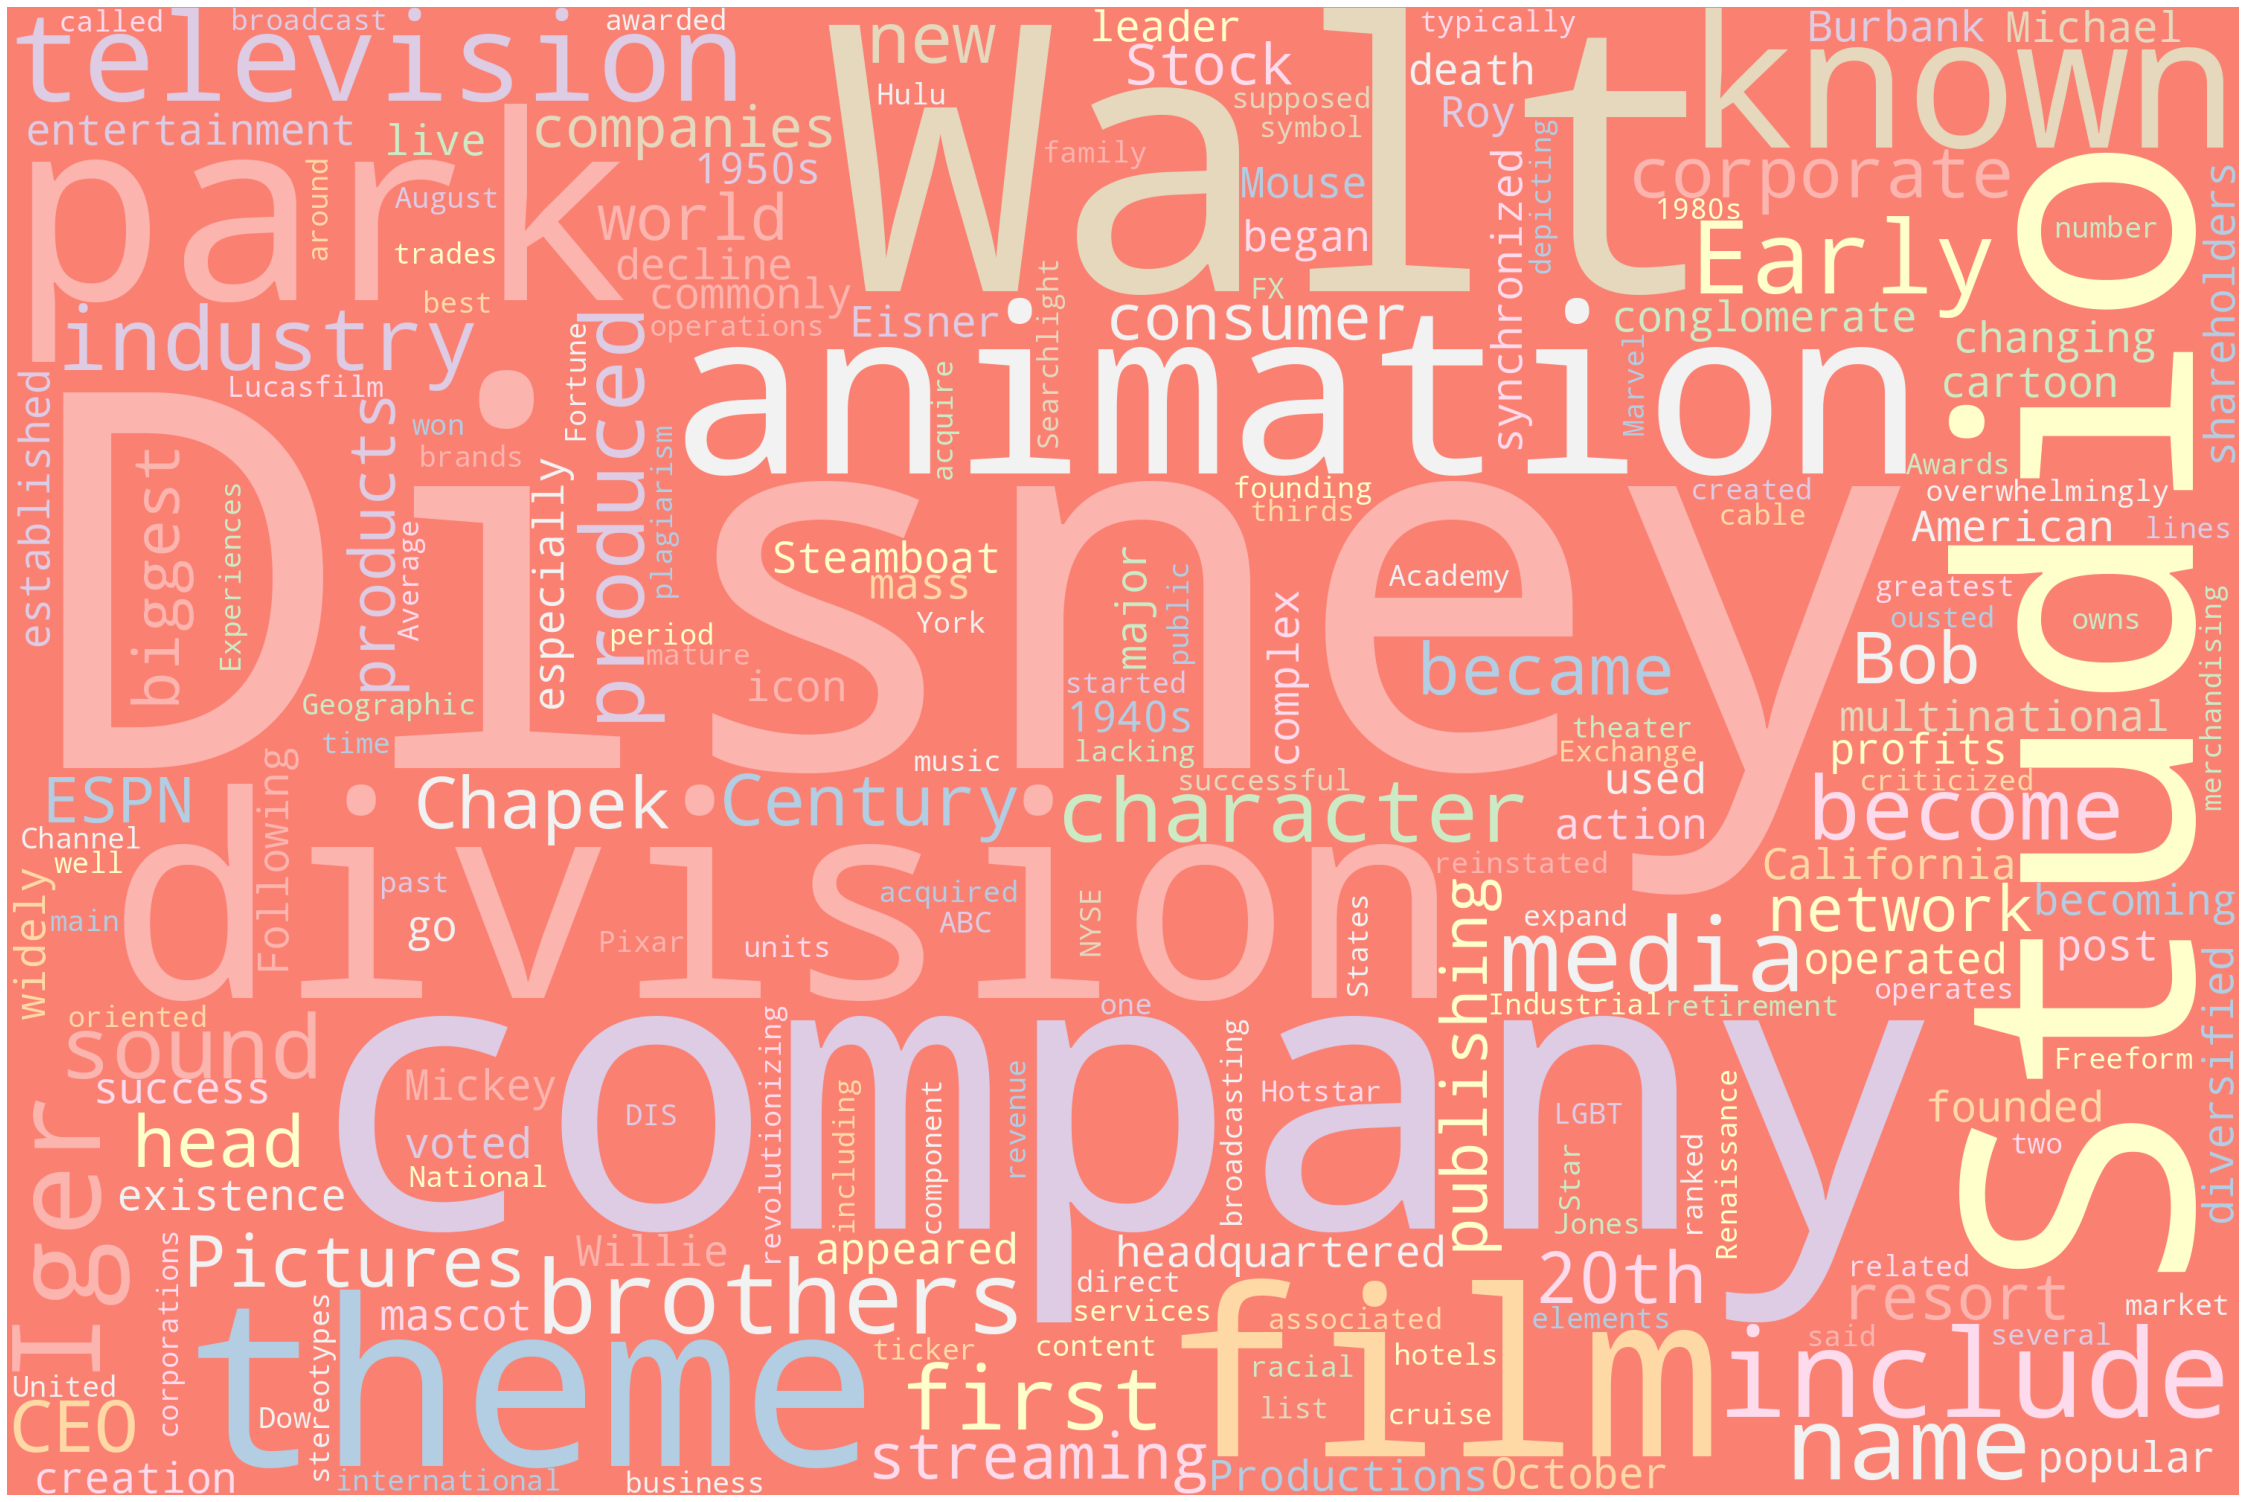

In [73]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
#import matplotlib
# MODIFIED FROM 
# https://towardsdatascience.com/simple-wordcloud-in-python-2ae54a9f58e5
def generate_word_cloud(my_text):
    # exit()
    # Import package
    # Define a function to plot word cloud
    #plt.rcParams['font.family'] = 'DejaVu Sans'
    def plot_cloud(wordcloud):
        # Set figure size
        plt.figure(figsize=(40, 30))
        # Display image
        plt.imshow(wordcloud) 
        # No axis details
        plt.axis("off");

    # Generate word cloud
    wordcloud = WordCloud(
        width = 3000,
        height = 2000, 
        random_state=1, 
        background_color='salmon', 
        colormap='Pastel1', 
        collocations=False,
        stopwords = STOPWORDS).generate(my_text)
    plot_cloud(wordcloud)
    plt.show()

#generate_word_cloud(text)
generate_word_cloud(str(CleanJSON(FormURL(TOPIC), TOPIC)[0]))
generate_word_cloud(wikipedia.summary(TOPIC))



In [177]:
import pandas as pd
import numpy as np

In [178]:
# read data
df = pd.read_csv("../data/raw-data/news_r.csv")

In [179]:
## REMOVE SPACES FROM COLUMN NAMES
df.rename(columns=lambda x: x.strip(), inplace=True)
df.rename(columns={"publishedAt": 'date'}, inplace=True)
df = df.drop(columns=["Unnamed: 0"])

In [180]:
#CONVERT TYPECAST
df["date"] = pd.to_datetime(df["date"])

In [181]:
df = df.drop_duplicates()

In [182]:
df['content'] = df['content'].apply(lambda x : np.nan if "http" in x else x)
df['description'] = df['description'].apply(lambda x : np.nan if "http" in x else x)
df = df.replace('[Removed]', np.nan)

In [183]:
df = df.dropna(axis = 0)

In [184]:
for char in ['[', ']', '&', '$', '<ul>', '<li>', '</li>', '+', 'chars', 'amp', '#', '…', '®', '{', '}', '...', '%']:
    df['content'] = df['content'].apply(lambda x : x.replace(char, ''))
    df['description'] = df['description'].apply(lambda x : x.replace(char, ''))
    df['title'] = df['title'].apply(lambda x : x.replace(char, ''))

In [185]:
import re
df['content'] = df['content'].apply(lambda x: re.sub(r'[0-9]', '', x))
df['description'] = df['description'].apply(lambda x: re.sub(r'[0-9]', '', x))
df['title'] = df['title'].apply(lambda x: re.sub(r'[0-9]', '', x))

In [186]:
df.to_csv("../data/modified-data/clean_text.csv")

In [187]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = df['title'].tolist()
corpus.extend(df['description'].tolist())
vectorizer = CountVectorizer()
vectorizer.fit(corpus)
print("Vocabulary: ", vectorizer.vocabulary_)
import csv
with open('../data/clean-data/vocabulary.csv', 'w') as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in vectorizer.vocabulary_.items():
       writer.writerow([key, value])
vector = vectorizer.transform(corpus)
# Summarizing the Encoded Texts
print("Encoded Document is:\n", vector.toarray())
pd.DataFrame(vector.toarray()).to_csv("../data/modified-data/encode.csv")

Vocabulary:  {'sunny': 1112, 'or': 796, 'akshay': 37, 'who': 1298, 'will': 1303, 'you': 1335, 'watch': 1275, 'loki': 656, 'season': 997, 'temporal': 1143, 'loom': 663, 'explained': 387, 'what': 1290, 'is': 586, 'the': 1151, 'tva': 1212, 'machine': 670, 'that': 1150, 'created': 262, 'mcu': 695, 'sacred': 979, 'timeline': 1177, 'stack': 1071, 'spotify': 1070, 'to': 1182, 'launch': 623, 'video': 1247, 'ads': 23, 'on': 788, 'roku': 967, 'meta': 708, 'considers': 243, 'ad': 17, 'free': 448, 'tier': 1171, 'in': 563, 'eu': 370, 'my': 743, 'disney': 315, 'top': 1191, 'mickey': 711, 'not': 770, 'so': 1046, 'scary': 987, 'halloween': 504, 'party': 826, 'today': 1183, 'wordle': 1314, 'hints': 530, 'clues': 220, 'and': 58, 'answer': 63, 'for': 441, 'friday': 450, 'october': 776, 'th': 1147, 'it': 589, 'pivotal': 842, 'year': 1330, 'labor': 615, 'strikes': 1093, 'charts': 207, 'tell': 1141, 'story': 1084, 'americans': 52, 'are': 73, 'unleashing': 1222, 'monsters': 727, 'they': 1157, 'have': 516, 'n

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
# read data
x = pd.read_csv("../data/modified-data/Monthly_Stock.csv")
y = pd.read_csv("../data/modified-data/sp500_month.csv")


In [3]:
## select columns
x = x[['NFLX', 'AAPL', 'JPM']]
y = y[['x']]

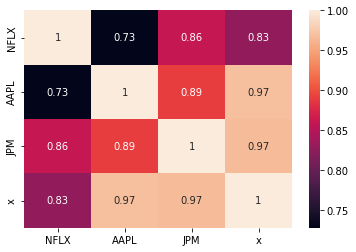

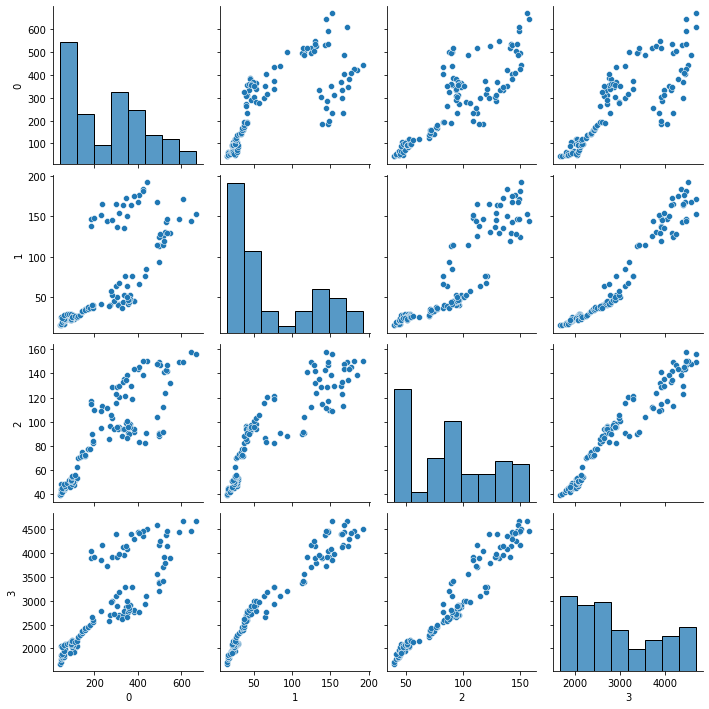

In [4]:
# calculate correlation and plot
df_xy = pd.concat([x, y], axis=1)
sns.heatmap(df_xy.corr('pearson'), annot=True)
sns.pairplot(pd.DataFrame(np.hstack((x,y))))

### Import

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score


/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [4]:
df = pd.read_csv("../data/modified-data/cleaned_stock.csv")
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted', 'dn', 'mavg', 'up', 'Stock']]
df['Stock'] = df['Stock'].astype('category').cat.codes
print(df)
# Disney = 0, Paramount = 1, Warner Bros = 2

            Open        High         Low       Close    Volume    Adjusted  \
0     155.830002  157.559998  155.360001  156.759995  10222800  156.759995   
1     158.589996  160.320007  155.550003  155.729996  16582000  155.729996   
2     156.520004  159.380005  155.100006  155.190002  12272100  155.190002   
3     156.240005  157.770004  153.679993  156.899994  11095300  156.899994   
4     156.899994  159.300003  156.289993  157.830002   9554600  157.830002   
...          ...         ...         ...         ...       ...         ...   
1375   10.010000   10.180000    9.720000    9.730000  32193700    9.730000   
1376    9.700000    9.970000    9.570000    9.800000  18682700    9.800000   
1377    9.800000    9.910000    9.530000    9.550000  15150700    9.550000   
1378    9.650000    9.970000    9.630000    9.850000  18128400    9.850000   
1379    9.890000   10.110000    9.800000    9.940000  23004200    9.940000   

              dn        mavg          up  Stock  
0     146.548

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load your dataset here
# Assuming df is your DataFrame

# Select the features and target
X = df[["Adjusted", "dn"]]
y = df["Stock"]  # Replace "Stock" with your actual target column name

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("x_train.shape		:",X_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",X_test.shape)
print("y_test.shape		:",y_test.shape)


x_train.shape		: (1104, 2)
y_train.shape		: (1104,)
X_test.shape		: (276, 2)
y_test.shape		: (276,)


In [8]:
# Initialize the MultinomialNB model
model = MultinomialNB()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the classification report for more detailed metrics
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.5362318840579711
Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.75      0.65        93
           1       0.00      0.00      0.00        95
           2       0.51      0.89      0.65        88

    accuracy                           0.54       276
   macro avg       0.36      0.55      0.43       276
weighted avg       0.35      0.54      0.42       276



/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:

def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(X_train)
      yp_test = model.predict(X_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

In [14]:
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 48.731884057971016
Number of mislabeled points out of a total 1104 points = 566

TEST SET (UNTRAINED DATA):
Accuracy: 53.62318840579711
Number of mislabeled points out of a total 276 points = 128

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
695     1
1088    2
1106    2
558     1
494     1
462     1
1074    2
243     0
936     2
654     1
756     1
1309    2
420     0
982     2
54      0
1089    2
783     1
109     0
774     1
571     1
Name: Stock, dtype: int8
[0 2 2 2 0 2 2 0 2 0 0 2 0 0 2 0 2 0 2 0]
ERRORS: 695    -1
1088    0
1106    0
558     1
494    -1
462     1
1074    0
243     0
936     0
654    -1
756    -1
1309    0
420     0
982    -2
54      2
1089   -2
783     1
109     0
774     1
571    -1
Name: Stock, dtype: int8

TEST SET (UNTRAINED DATA):
377     0
548     1
979     2
1149    2
481     1
76      0
67      0
1096    2
584     1
824     1
1052    2
828     1
184     0
989     2
575     1
429     0
361     0
829     1
1239    

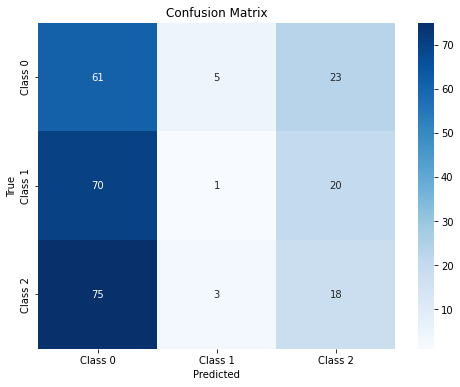

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


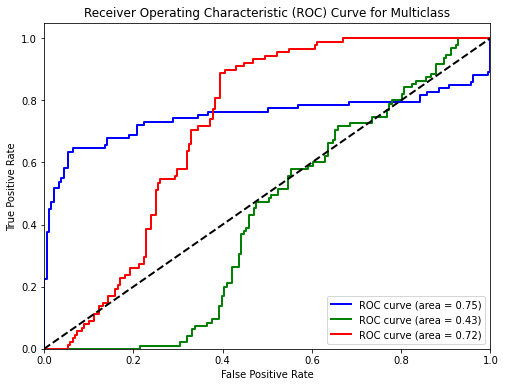

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to a binary form (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 

# Initialize the model and train it
model = MultinomialNB()
model.fit(X_train, y_train)

# Get class probabilities
y_prob = model.predict_proba(X_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


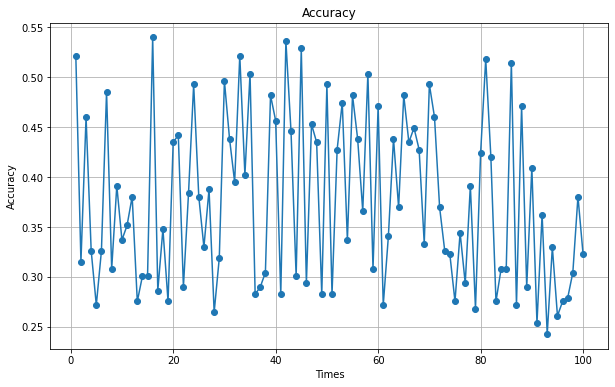

In [19]:
# Define the number of iterations and an array to store accuracy values
n = 100
accuracy_values = []

# Load your data and labels here, replace with your actual data


for iteration in range(1, n + 1):
    # Split the data into training and validation subsets for each iteration
    x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=iteration)

    # Initialize the MultinomialNB model
    model = MultinomialNB()

    # Train the MultinomialNB model on the current subset of training data
    model.fit(x_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(x_valid)

    # Calculate and store the accuracy for this time
    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy values
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), accuracy_values, marker='o')
plt.title('Accuracy')
plt.xlabel('Times')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


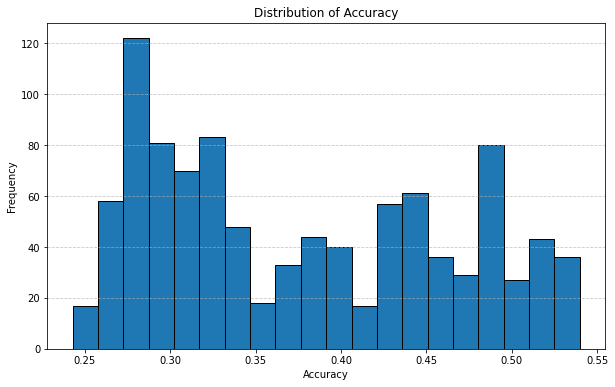

In [23]:
n = 1000

# Store accuracy values in a list
accuracy_values = []

for _ in range(n):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(100))

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the distribution of accuracy values
plt.figure(figsize=(10, 6))
plt.hist(accuracy_values, bins=20, edgecolor='black')
plt.title('Distribution of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Import

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.metrics import accuracy_score


/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


### Read and re-format

In [5]:
#RELOAD FILE AND PRETEND THAT IS OUR STARTING POINT 
df=pd.read_csv('../data/raw-data/text.csv')  
print(df.shape)

#CONVERT FROM STRING LABELS TO INTEGERS 
labels=[]; #y1=[]; y2=[]
y1=[]
for label in df["Label"]:
    if label not in labels:
        labels.append(label)
        print("index =",len(labels)-1,": label =",label)
    for i in range(0,len(labels)):
        if(label==labels[i]):
            y1.append(i)
y1=np.array(y1)

# CONVERT DF TO LIST OF STRINGS 
corpus=df["Title"].to_list()
y2=df["Label"].to_numpy()

print("number of text chunks = ",len(corpus))
print(corpus[0:3])


(4998, 2)
index = 0 : label = Netflix
index = 1 : label = Hulu
index = 2 : label = Prime Video
index = 3 : label = Disney+
number of text chunks =  4998
['Breaking Bad', 'Stranger Things', 'Better Call Saul']


### Vectorize the text data

In [6]:

# INITIALIZE COUNT VECTORIZER
# minDF = 0.01 means "ignore terms that appear in less than 1% of the documents". 
# minDF = 5 means "ignore terms that appear in less than 5 documents".
vectorizer=CountVectorizer(min_df=0.001)   

# RUN COUNT VECTORIZER ON OUR COURPUS 
Xs  =  vectorizer.fit_transform(corpus)   
X=np.array(Xs.todense())

#CONVERT TO ONE-HOT VECTORS
maxs=np.max(X,axis=0)
X=np.ceil(X/maxs)

# DOUBLE CHECK 
print(X.shape,y1.shape,y2.shape)
print("DATA POINT-0:",X[0,0:10],"y1 =",y1[0],"  y2 =",y2[0])

(4998, 477) (4998,) (4998,)
DATA POINT-0: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] y1 = 0   y2 = Netflix


### Partition Data

**Assignment 3.2.4: Break data into an 80-20 training/test set** 

As a sanity check, reprint the shapes to make sure everything is correct

```
x_train.shape		: (120, 4)
y_train.shape		: (120,)
X_test.shape		: (30, 4)
y_test.shape		: (30,)
```

In [7]:
# BEFORE SPLIT
print(y1[1000:1200])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# INSERT CODE TO PARTITION DATASET INTO TRAINING-TEST

from sklearn.model_selection import train_test_split
test_ratio=0.2

# SPLIT ARRAYS OR MATRICES INTO RANDOM TRAIN AND TEST SUBSETS.
x_train, x_test, y_train, y_test = train_test_split(X, y1, test_size=test_ratio, random_state=0)
y_train=y_train.flatten()
y_test=y_test.flatten()

print("x_train.shape		:",x_train.shape)
print("y_train.shape		:",y_train.shape)

print("X_test.shape		:",x_test.shape)
print("y_test.shape		:",y_test.shape)

x_train.shape		: (3998, 477)
y_train.shape		: (3998,)
X_test.shape		: (1000, 477)
y_test.shape		: (1000,)


In [9]:
#CHECK TO MAKE SURE IT WAS RANDOMIZED 
print(y_train[0:100])

[3 0 2 1 0 2 3 2 2 2 2 2 2 1 0 0 0 1 2 2 2 0 1 1 2 1 1 2 2 3 2 2 1 0 3 3 1
 2 2 0 0 1 1 1 0 1 2 2 0 1 0 2 2 2 2 3 0 1 3 2 2 0 0 0 2 1 0 2 1 0 1 0 0 1
 2 1 0 2 1 2 0 1 0 0 1 2 2 2 2 1 0 2 1 2 0 1 0 3 2 2]


### Utility function

* Write a function to report accuracy
* Note this will act on object stored in pythons global scope. Therefore as long as everything is named the same you can recycle it for multiple models

In [10]:

def report(y,ypred):
      #ACCURACY COMPUTE 
      print("Accuracy:",accuracy_score(y, ypred)*100)
      print("Number of mislabeled points out of a total %d points = %d"
            % (y.shape[0], (y != ypred).sum()))

def print_model_summary():
      # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
      yp_train = model.predict(x_train)
      yp_test = model.predict(x_test)

      print("ACCURACY CALCULATION\n")

      print("TRAINING SET:")
      report(y_train,yp_train)

      print("\nTEST SET (UNTRAINED DATA):")
      report(y_test,yp_test)

      print("\nCHECK FIRST 20 PREDICTIONS")
      print("TRAINING SET:")
      print(y_train[0:20])
      print(yp_train[0:20])
      print("ERRORS:",yp_train[0:20]-y_train[0:20])

      print("\nTEST SET (UNTRAINED DATA):")
      print(y_test[0:20])
      print(yp_test[0:20])
      print("ERRORS:",yp_test[0:20]-y_test[0:20])

## Classification model-1: Multinomial Naive Bayes  

The following code applies the multi-nomial Naive Bayes classifier to the text data-set generated with wikipeda

### Train model 

* Use SkLearn to train a MultinomialNB model 
*  When the model is trained, insert code to output the following information about the training and test set (your numbers will vary)
   * **Remember that the test set was NOT seen during the training process, and therefore "test" predictions show how the model does on new "unseen" data**
  


In [11]:
from sklearn.naive_bayes import MultinomialNB

# INITIALIZE MODEL 
model = MultinomialNB()

# TRAIN MODEL 
model.fit(x_train,y_train)

# PRINT REPORT USING UTILITY FUNCTION ABOVE
print_model_summary()

ACCURACY CALCULATION

TRAINING SET:
Accuracy: 48.049024512256125
Number of mislabeled points out of a total 3998 points = 2077

TEST SET (UNTRAINED DATA):
Accuracy: 41.099999999999994
Number of mislabeled points out of a total 1000 points = 589

CHECK FIRST 20 PREDICTIONS
TRAINING SET:
[3 0 2 1 0 2 3 2 2 2 2 2 2 1 0 0 0 1 2 2]
[3 0 1 0 2 0 0 2 0 2 2 2 0 0 0 0 0 1 2 0]
ERRORS: [ 0  0 -1 -1  2 -2 -3  0 -2  0  0  0 -2 -1  0  0  0  0  0 -2]

TEST SET (UNTRAINED DATA):
[2 1 0 0 1 0 0 2 2 0 3 0 2 2 0 1 3 1 0 0]
[2 1 0 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0]
ERRORS: [ 0  0  0  0  0  0  0 -2 -2  0 -3  0  0 -2  0 -1 -3 -1  0  0]


Classification Report:
               precision    recall  f1-score   support

     Class 0       0.45      0.79      0.57       366
     Class 1       0.50      0.26      0.34       259
     Class 2       0.60      0.38      0.46       322
     Class 3       0.88      0.28      0.43        53

    accuracy                           0.49      1000
   macro avg       0.61      0.43      0.45      1000
weighted avg       0.53      0.49      0.47      1000



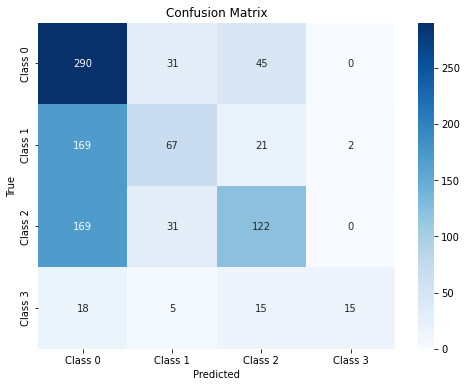

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Generate a classification report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
print("Classification Report:\n", report)

# Generate a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


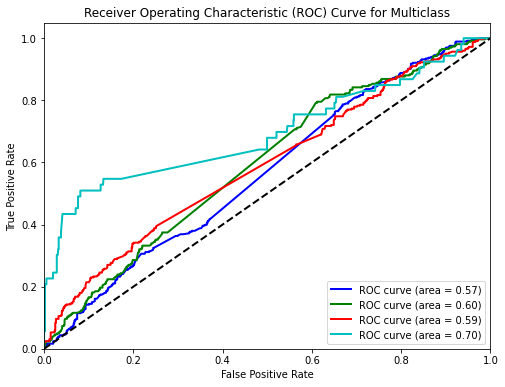

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Convert labels to a binary form (one-hot encoding)
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

# Initialize the model and train it
model = MultinomialNB()
model.fit(x_train, y_train)

# Get class probabilities
y_prob = model.predict_proba(x_test)

# Compute ROC curve and AUC for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multiclass')
plt.legend(loc="lower right")
plt.show()


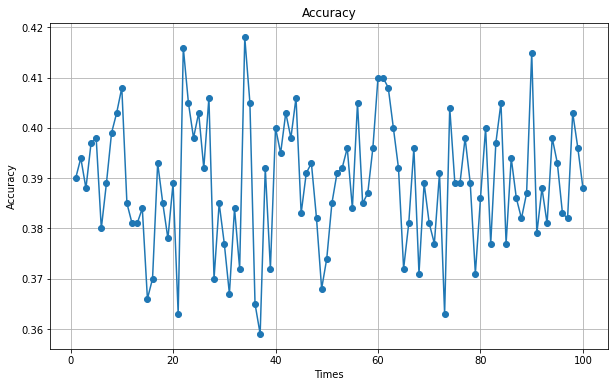

In [25]:
# Define the number of times and an array to store accuracy values
n = 100
accuracy_values = []

# Load your data and labels here, replace with your actual data


for iteration in range(1, n + 1):
    # Split the data into training and validation subsets for each iteration
    x_train, x_valid, y_train, y_valid = train_test_split(X, y1, test_size=0.2, random_state=iteration)

    # Initialize the MultinomialNB model
    model = MultinomialNB()

    # Train the MultinomialNB model on the current subset of training data
    model.fit(x_train, y_train)

    # Make predictions on the validation data
    y_pred = model.predict(x_valid)

    # Calculate and store the accuracy for this times
    accuracy = accuracy_score(y_valid, y_pred)
    accuracy_values.append(accuracy)

# Plot the accuracy values 
plt.figure(figsize=(10, 6))
plt.plot(range(1, n + 1), accuracy_values, marker='o')
plt.title('Accuracy')
plt.xlabel('Times')
plt.ylabel('Accuracy')
plt.grid()
plt.show()


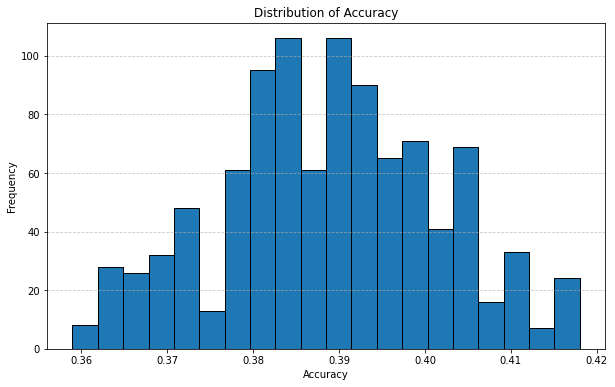

In [28]:
n = 1000

# Store accuracy values in a list
accuracy_values = []

for _ in range(n):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=np.random.randint(100))

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = model.predict(X_test)

    # Calculate and store the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Plot the distribution of accuracy values
plt.figure(figsize=(10, 6))
plt.hist(accuracy_values, bins=20, edgecolor='black')
plt.title('Distribution of Accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

---
format:
  html:
    embed-resources: true
    code-fold: true
---

In [191]:
# import the necessary packages
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [192]:
# read data
df = pd.read_csv("../data/modified-data/stock_cluster.csv")
df.head()

Unnamed: 0        Date        Open        High         Low       Close  \
0  2022-01-03  2022-01-03  605.609985  609.989990  590.559998  597.369995   
1  2022-01-04  2022-01-04  599.909973  600.409973  581.599976  591.150024   
2  2022-01-05  2022-01-05  592.000000  592.840027  566.880005  567.520020   
3  2022-01-06  2022-01-06  554.340027  563.359985  542.010010  553.289978   
4  2022-01-07  2022-01-07  549.460022  553.429993  538.219971  541.059998   

    Volume    Adjusted          dn        mavg          up Stock   direction  
0  3067500  597.369995  587.291452  607.250833  627.210215  NFLX  Decreasing  
1  4393100  591.150024  585.186408  606.287166  627.387925  NFLX  Decreasing  
2  4148700  567.520020  580.284351  603.976666  627.668982  NFLX  Decreasing  
3  5711800  553.289978  570.018038  600.225332  630.432625  NFLX  Decreasing  
4  3382900  541.059998  558.782412  596.575831  634.369250  NFLX  Decreasing

In [193]:
# define X and Y
from sklearn.preprocessing import StandardScaler

X = df[['Adjusted', 'Volume']]
print(X.head())
X = StandardScaler().fit_transform(X)

Y = df[['Stock']]
print(Y.head())


     Adjusted   Volume
0  597.369995  3067500
1  591.150024  4393100
2  567.520020  4148700
3  553.289978  5711800
4  541.059998  3382900
  Stock
0  NFLX
1  NFLX
2  NFLX
3  NFLX
4  NFLX


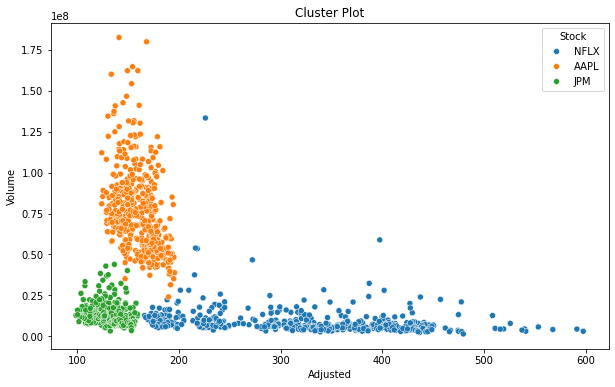

In [194]:
# visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Adjusted', y='Volume', hue='Stock')
plt.xlabel('Adjusted')
plt.ylabel('Volume')
plt.title('Cluster Plot')
plt.legend(loc = "upper right", title = "Stock")
plt.show()

In [195]:
# import relevent libraries for clustering. we will use KMeans, AgglomerativeClustering, MeanShift, Birch, and DBSCAN
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [196]:
import sklearn.cluster

# THIS WILL ITERATE OVER ONE HYPER-PARAMETER (GRID SEARCH) 
# AND RETURN THE CLUSTER RESULT THAT OPTIMIZES THE SILHOUETTE SCORE
def maximize_silhouette(X,algo="birch",nmax=20,i_plot=False):

    # PARAM
    i_print=False

    #FORCE CONTIGUOUS
    X=np.ascontiguousarray(X) 

    # LOOP OVER HYPER-PARAM
    params=[]; sil_scores=[]
    sil_max=-10
    for param in range(2,nmax+1):
        if(algo=="birch"):
            model = sklearn.cluster.Birch(n_clusters=param).fit(X)
            labels=model.predict(X)

        if(algo=="ag"):
            model = sklearn.cluster.AgglomerativeClustering(n_clusters=param).fit(X)
            labels=model.labels_

        if(algo=="dbscan"):
            param=0.05*(param-1)
            model = sklearn.cluster.DBSCAN(eps=param).fit(X)
            labels=model.labels_

        if(algo=="kmeans"):
            model = sklearn.cluster.KMeans(n_clusters=param).fit(X)
            labels=model.predict(X)
        
        if(algo=="meanshift"):
            model = sklearn.cluster.MeanShift(bandwidth=param).fit(X)
            labels=model.labels_

        try:
            sil_scores.append(sklearn.metrics.silhouette_score(X,labels))
            params.append(param)
        except:
            continue 

        if(i_print): print(param,sil_scores[-1])
        
        if(sil_scores[-1]>sil_max):
             opt_param=param
             sil_max=sil_scores[-1]
             opt_labels=labels
    print("Algorithm = ", algo)
    print("OPTIMAL PARAMETER =",opt_param)

    if(i_plot):
        fig, ax = plt.subplots()
        ax.plot(params, sil_scores, "-o")  
        ax.set(xlabel='Hyper-parameter', ylabel='Silhouette')
        plt.show()

    return opt_labels

Algorithm =  ag
OPTIMAL PARAMETER = 3


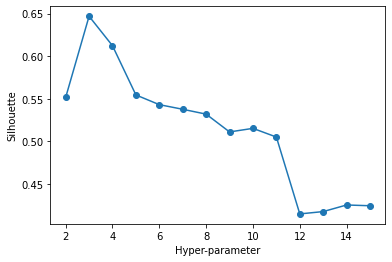

Algorithm =  dbscan
OPTIMAL PARAMETER = 0.35000000000000003


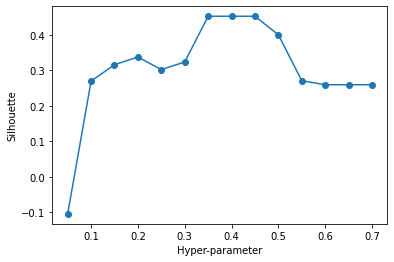

Algorithm =  birch
OPTIMAL PARAMETER = 4


/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (11) by BIRCH is less than (12). Decrease the threshold.
  warnings.warn(
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (11) by BIRCH is less than (13). Decrease the threshold.
  warnings.warn(
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (11) by BIRCH is less than (14). Decrease the threshold.
  warnings.warn(
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_birch.py:725: ConvergenceWarning: Number of subclusters found (11) by BIRCH is less than (15). Decrease the threshold.
  warnings.warn(


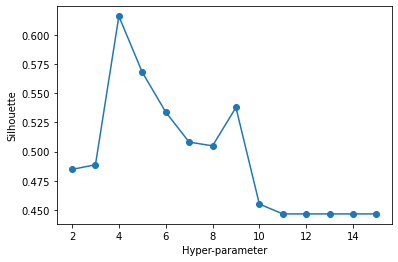

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Algorithm =  kmeans
OPTIMAL PARAMETER = 3


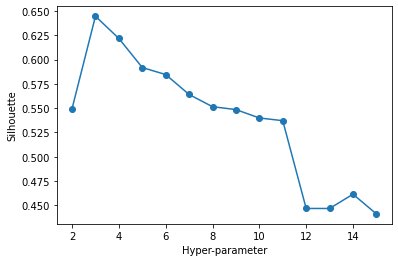

In [197]:
# AGGLOMERATIVE CLUSTERING
opt_labels=maximize_silhouette(X,algo="ag",nmax=15, i_plot=True)
# DBSCAN
opt_labels=maximize_silhouette(X,algo="dbscan",nmax=15, i_plot=True)
# BRICH
opt_labels=maximize_silhouette(X,algo="birch",nmax=15, i_plot=True)
# KMEANS
opt_labels=maximize_silhouette(X,algo="kmeans",nmax=15, i_plot=True)

In [198]:
## kmeans
from scipy.spatial.distance import cdist
distortions = []
inertias = []

for i in range(1, 11):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    
    # Calculate distortion and inertia
    inertias.append(kmeans.inertia_)
    distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'),axis=1)) / X.shape[0])

# Create a DataFrame to store the data
data = pd.DataFrame({'Cluster': range(1, 11), 'Distortion': distortions, 'Inertia': inertias})

data

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_

Cluster  Distortion      Inertia
0        1    1.268869  2862.000000
1        2    0.855398  1407.136470
2        3    0.463472   493.295513
3        4    0.391171   332.985543
4        5    0.330239   237.692843
5        6    0.292370   183.698590
6        7    0.255055   138.253996
7        8    0.238272   119.543276
8        9    0.227034   101.652802
9       10    0.212766    89.814633

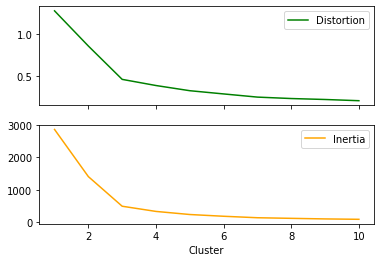

In [199]:
# plot distortion and inertia for kmeans, you can either plot them seperately or use fig, ax = plt.subplots(1, 2) to plot them in the same figure. Suggest the optimal number of clusters based on the plot.

# Create two subplots, sharing the x-axis
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Plot Distortion in the top subplot
ax1.plot(data['Cluster'], data['Distortion'], linestyle='-', label='Distortion', color='green')

# Plot Inertia in the bottom subplot
ax2.plot(data['Cluster'], data['Inertia'], linestyle='-', label='Inertia', color='orange')
ax2.set_xlabel('Cluster')

# Add a legend to both subplots
ax1.legend()
ax2.legend()
plt.show()

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


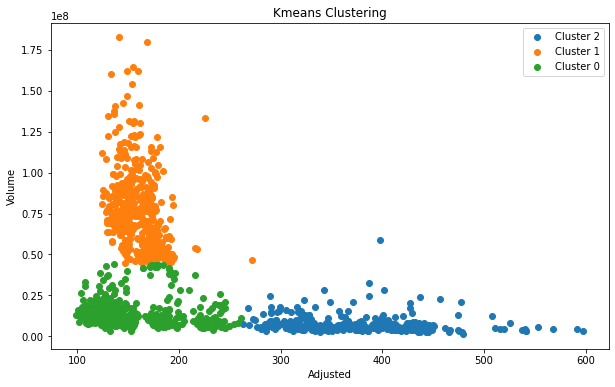

In [200]:
# Perform kmeans
kmeans = KMeans(n_clusters = 3)
cluster_labels = kmeans.fit_predict(X)

# Add the cluster labels to your DataFrame
df['cluster_labels'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot the data points with different colors for each cluster
for cluster_label in df['cluster_labels'].unique():
    cluster_data = df[df['cluster_labels'] == cluster_label]
    plt.scatter(
        cluster_data['Adjusted'],
        cluster_data['Volume'],
        label=f'Cluster {cluster_label}',
    )

plt.xlabel('Adjusted')
plt.ylabel('Volume')
plt.title('Kmeans Clustering')
plt.legend()
plt.show()

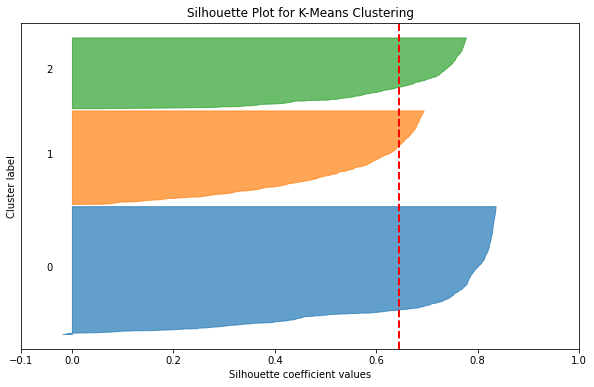

In [201]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Calculate silhouette scores
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

# Create Silhouette plot
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


Best combination: eps = 0.1, min_samples = 9.0
Number of clusters: 4.0
Best Silhouette Score: 0.4658880301489884


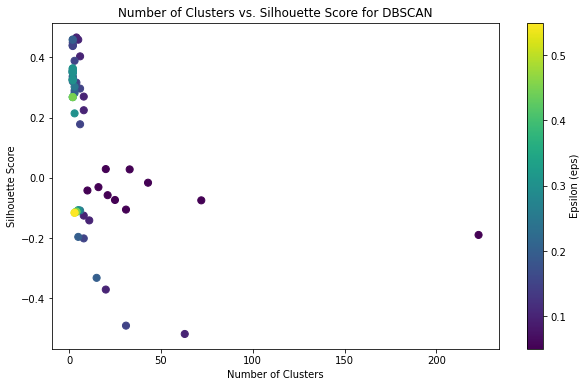

In [202]:
# perform DBSCAN clustering. use the eps and min_samples parameters to find the optimal number of clusters. plot the number of clusters vs the silhouette score. Suggest the optimal number of clusters based on the plot.
from sklearn.metrics import silhouette_score

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Define a range of values for eps and min_samples
eps_range = np.linspace(0.05, 1.0, num=20)
min_samples_range = range(1, 11)

# Perform DBSCAN clustering for different combinations of eps and min_samples
for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X)  # Replace X with your data
        num_clusters = len(np.unique(labels)) - 1  # Subtract 1 to account for noise points
        if num_clusters > 1:  # Ensure that at least two clusters are formed
            silhouette = silhouette_score(X, labels)
            silhouette_scores.append((eps, min_samples, num_clusters, silhouette))

# Convert the list of scores to a NumPy array for easier manipulation
silhouette_scores = np.array(silhouette_scores)

# Plot the number of clusters vs. silhouette score
plt.figure(figsize=(10, 6))
plt.scatter(silhouette_scores[:, 2], silhouette_scores[:, 3], c=silhouette_scores[:, 0], cmap='viridis', s=50)
plt.colorbar(label='Epsilon (eps)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Number of Clusters vs. Silhouette Score for DBSCAN')
#plt.grid(True)

# Find the combination of eps and min_samples with the highest silhouette score
best_score_idx = np.argmax(silhouette_scores[:, 3])
best_eps = silhouette_scores[best_score_idx, 0]
best_min_samples = silhouette_scores[best_score_idx, 1]
best_num_clusters = silhouette_scores[best_score_idx, 2]
best_silhouette_score = silhouette_scores[best_score_idx, 3]

print(f"Best combination: eps = {best_eps}, min_samples = {best_min_samples}")
print(f"Number of clusters: {best_num_clusters}")
print(f"Best Silhouette Score: {best_silhouette_score}")

plt.show()

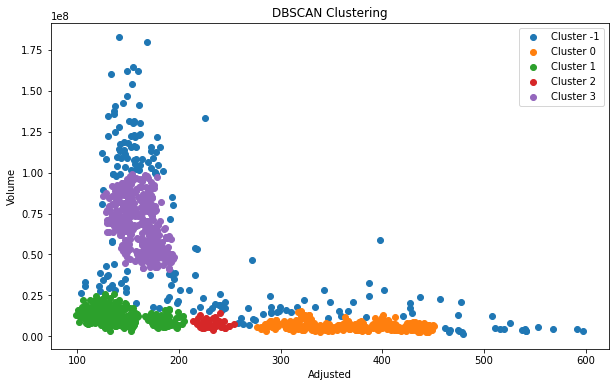

In [203]:
# Perform DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=9)
cluster_labels = dbscan.fit_predict(X)

# Add the cluster labels to your DataFrame
df['cluster_labels'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot the data points with different colors for each cluster
for cluster_label in df['cluster_labels'].unique():
    cluster_data = df[df['cluster_labels'] == cluster_label]
    plt.scatter(
        cluster_data['Adjusted'],
        cluster_data['Volume'],
        label=f'Cluster {cluster_label}',
    )
plt.xlabel('Adjusted')
plt.ylabel('Volume')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()


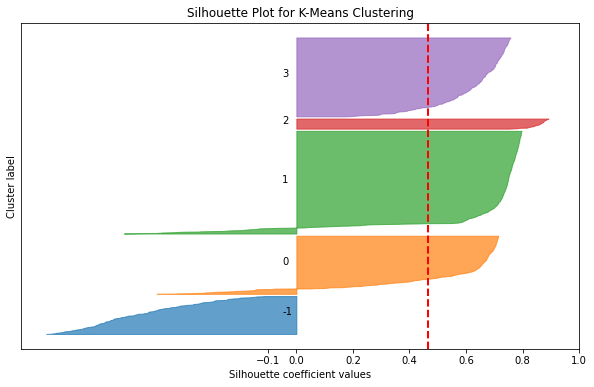

In [204]:
# Calculate silhouette scores
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

# Create Silhouette plot
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(-1, 4):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i+1]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title('Silhouette Plot for K-Means Clustering')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()

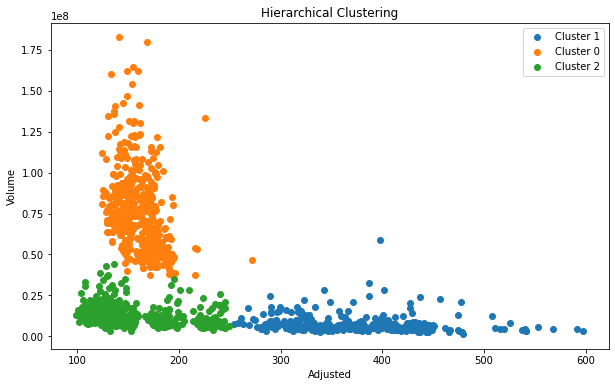

In [205]:
# Perform Hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)  # Specify the number of clusters
cluster_labels = agg_clustering.fit_predict(X)

# Add the cluster labels to your DataFrame
df['cluster_labels'] = cluster_labels

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Plot the data points with different colors for each cluster
for cluster_label in df['cluster_labels'].unique():
    cluster_data = df[df['cluster_labels'] == cluster_label]
    plt.scatter(
        cluster_data['Adjusted'],
        cluster_data['Volume'],
        label=f'Cluster {cluster_label}',
    )

plt.xlabel('Adjusted')
plt.ylabel('Volume')
plt.title('Hierarchical Clustering')
plt.legend()
plt.show()

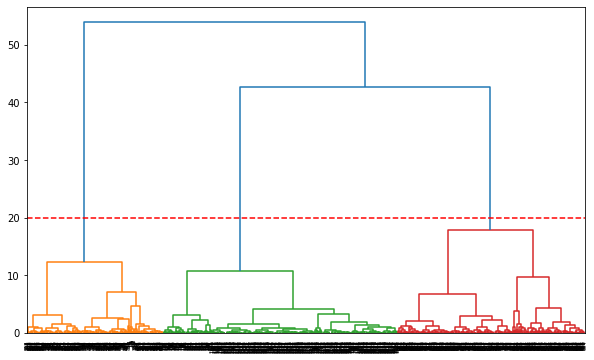

In [206]:
# create linkage for agglomerative clustering, and the dendrogram for the linkage. Suggest the optimal number of clusters based on the dendrogram.
from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the linkage matrix
linkage_matrix = linkage(X, method='ward')  # You can choose a different linkage method

# Create and visualize the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, truncate_mode='level')
plt.axhline(y=20, color='r', linestyle='--')
plt.show()

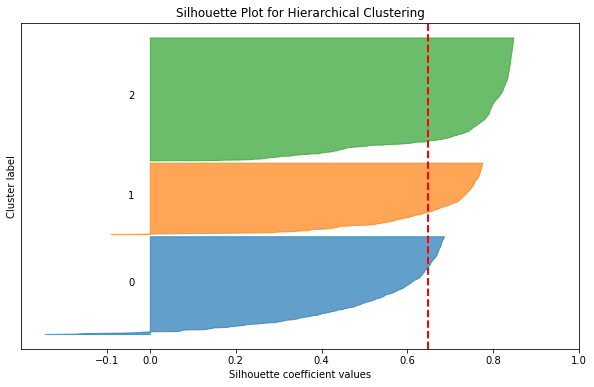

In [207]:
# Calculate silhouette scores
silhouette_vals = silhouette_samples(X, cluster_labels)
silhouette_avg = silhouette_score(X, cluster_labels)

# Create Silhouette plot
plt.figure(figsize=(10, 6))
y_lower = 10

for i in range(3):
    ith_cluster_silhouette_vals = silhouette_vals[cluster_labels == i]
    ith_cluster_silhouette_vals.sort()

    size_cluster_i = ith_cluster_silhouette_vals.shape[0]
    y_upper = y_lower + size_cluster_i

    color = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_vals, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for the next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title('Silhouette Plot for Hierarchical Clustering')
plt.xlabel('Silhouette coefficient values')
plt.ylabel('Cluster label')

# The vertical line for average silhouette score of all the values
plt.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)

plt.yticks([])  # Clear the yaxis labels / ticks
plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


---
format:
  html:
    embed-resources: true
    code-fold: true
---

In [110]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [111]:
# read data
df = pd.read_csv("../data/modified-data/stock_cluster.csv")
df.head()

Unnamed: 0        Date        Open        High         Low       Close  \
0  2022-01-03  2022-01-03  605.609985  609.989990  590.559998  597.369995   
1  2022-01-04  2022-01-04  599.909973  600.409973  581.599976  591.150024   
2  2022-01-05  2022-01-05  592.000000  592.840027  566.880005  567.520020   
3  2022-01-06  2022-01-06  554.340027  563.359985  542.010010  553.289978   
4  2022-01-07  2022-01-07  549.460022  553.429993  538.219971  541.059998   

    Volume    Adjusted          dn        mavg          up Stock   direction  
0  3067500  597.369995  587.291452  607.250833  627.210215  NFLX  Decreasing  
1  4393100  591.150024  585.186408  606.287166  627.387925  NFLX  Decreasing  
2  4148700  567.520020  580.284351  603.976666  627.668982  NFLX  Decreasing  
3  5711800  553.289978  570.018038  600.225332  630.432625  NFLX  Decreasing  
4  3382900  541.059998  558.782412  596.575831  634.369250  NFLX  Decreasing

In [112]:
# define X
X = df[['Open', 'High','Low', 'Close', 'Volume', 'Adjusted', 'dn', 'mavg', 'up']]
print(X.head())

         Open        High         Low       Close   Volume    Adjusted  \
0  605.609985  609.989990  590.559998  597.369995  3067500  597.369995   
1  599.909973  600.409973  581.599976  591.150024  4393100  591.150024   
2  592.000000  592.840027  566.880005  567.520020  4148700  567.520020   
3  554.340027  563.359985  542.010010  553.289978  5711800  553.289978   
4  549.460022  553.429993  538.219971  541.059998  3382900  541.059998   

           dn        mavg          up  
0  587.291452  607.250833  627.210215  
1  585.186408  606.287166  627.387925  
2  580.284351  603.976666  627.668982  
3  570.018038  600.225332  630.432625  
4  558.782412  596.575831  634.369250  


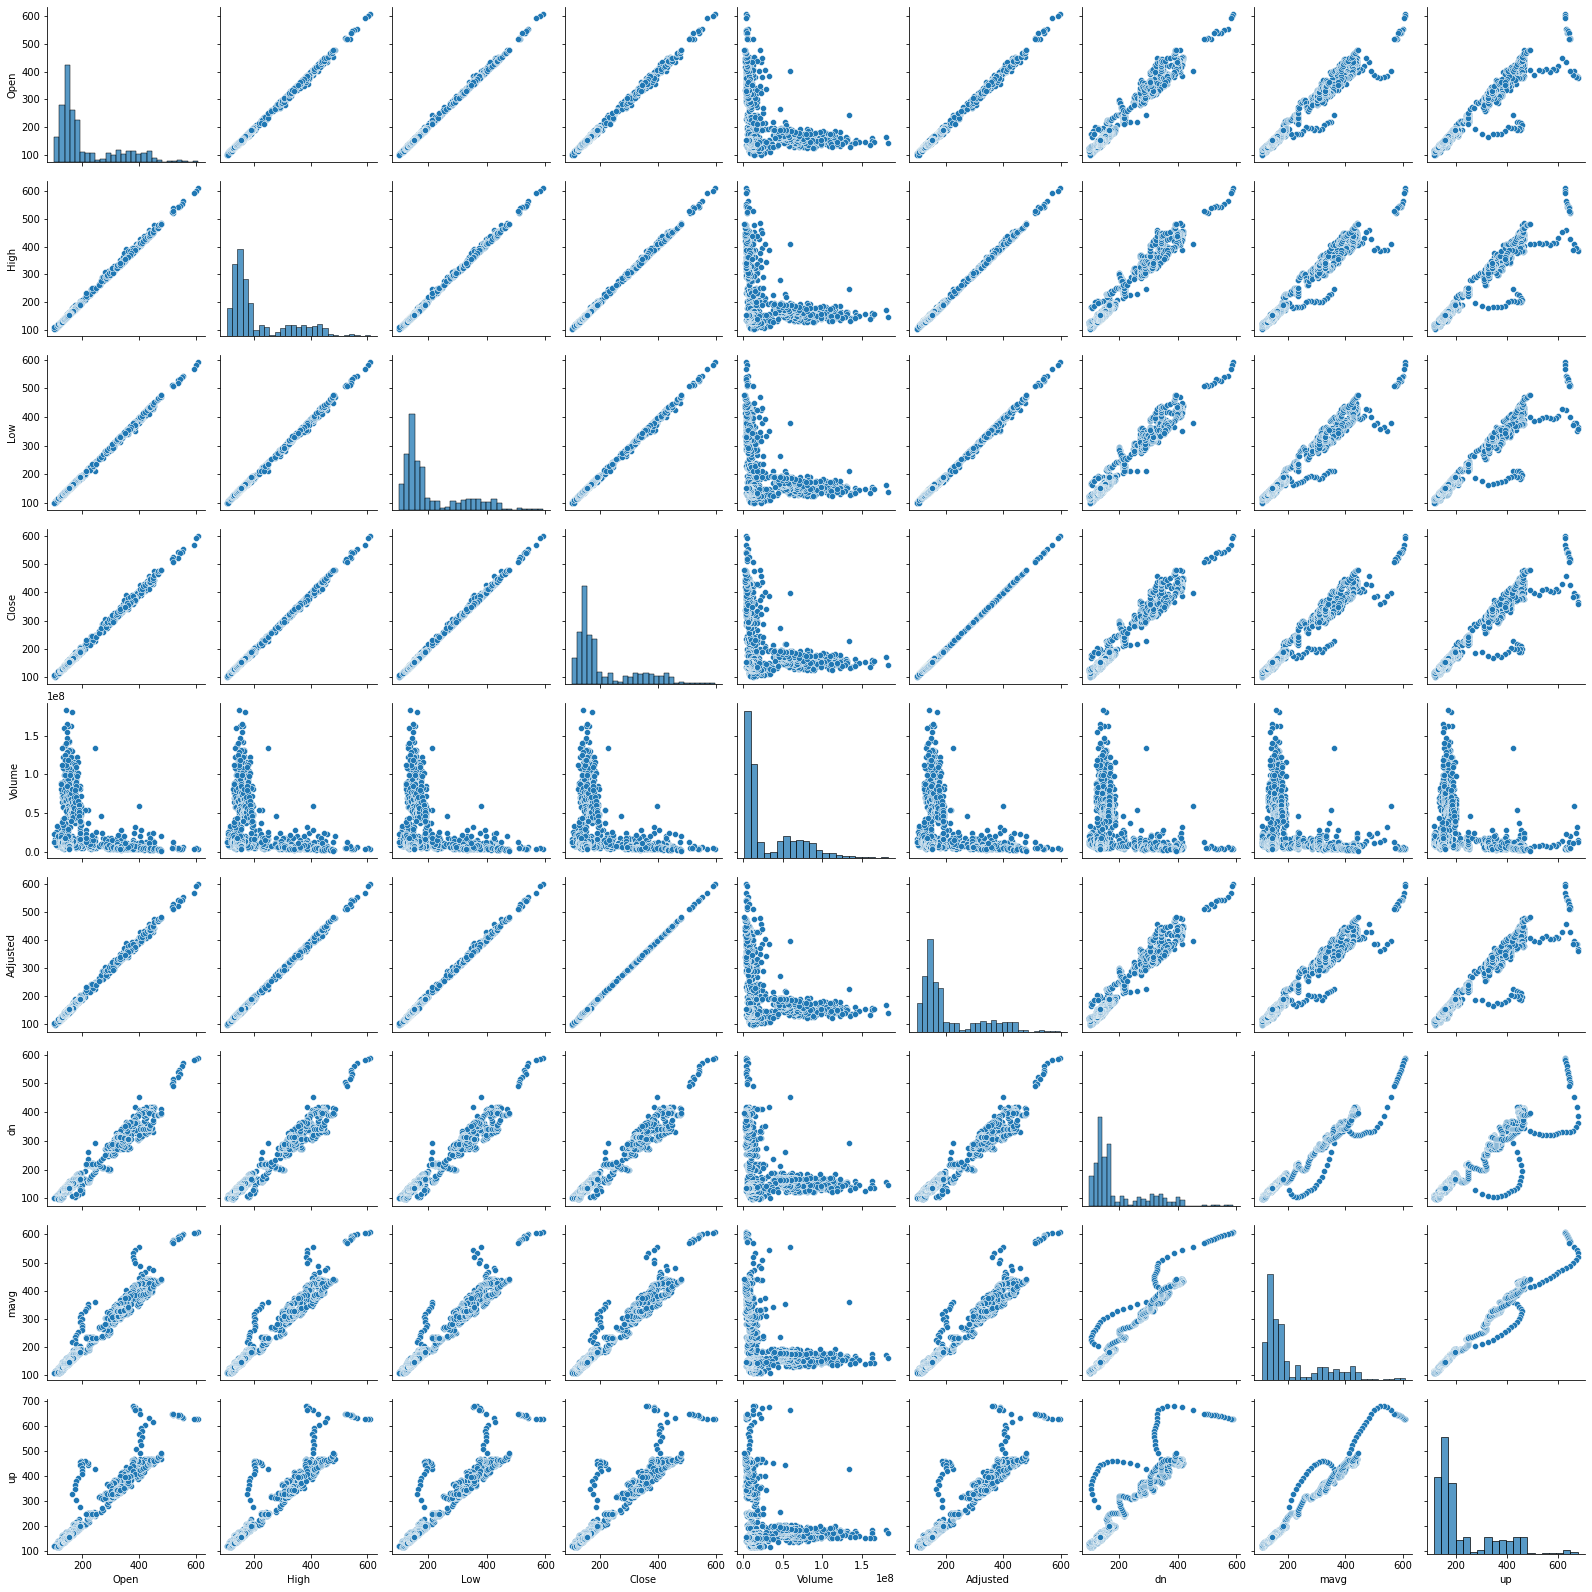

In [113]:
# pair plot
sns.pairplot(X)
plt.show()

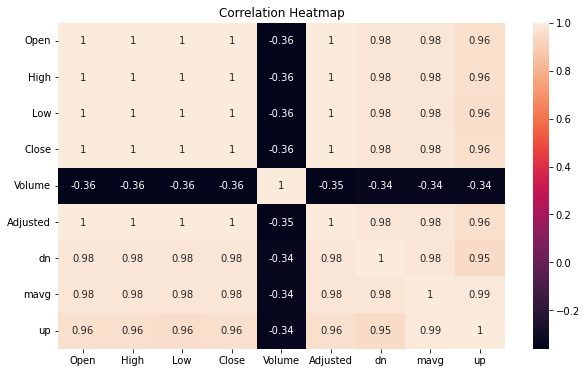

In [114]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

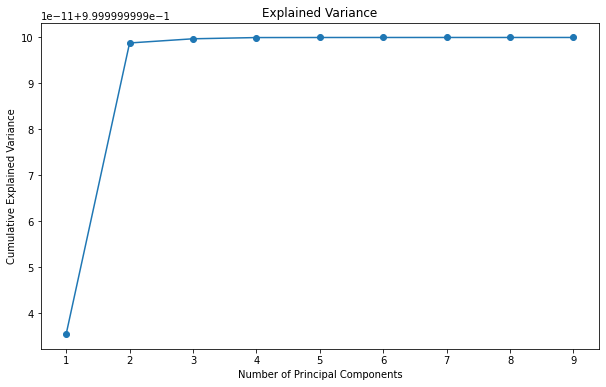

In [115]:
pca = PCA()
pca.fit(X)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), 
         pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [116]:
# PCA
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)   # 2 dimension
pca.fit(X)                 
newX=pca.fit_transform(X)  
print(pca.explained_variance_ratio_)  
print(newX)

[0.89109103 0.09554449]
[[10.85433149  0.68579939]
 [10.71167546  0.70664221]
 [10.41984188  0.66110329]
 ...
 [-1.50904694 -0.95411545]
 [-1.48990881 -1.00794026]
 [-1.47147694 -1.05500015]]


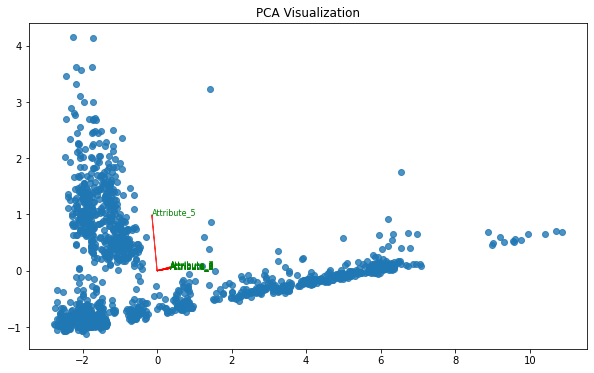

In [117]:
# Create a scatter plot of the first two attributes of the original data
plt.figure(figsize=(10, 6))

# Perform PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

plt.scatter(newX[:, 0], newX[:, 1], alpha=0.8)
plt.title('PCA Visualization')

# Plotting the principal components
for i, (x, y) in enumerate(pca.components_.T):
    plt.arrow(0, 0, x, y, color='r', alpha=0.8)
    plt.text(x, y, f'Attribute_{i+1}', color='g', fontsize=8)

plt.show()

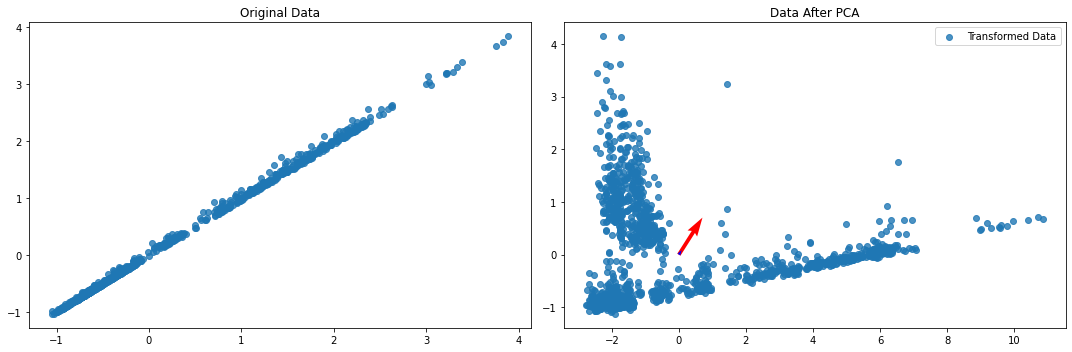

In [125]:
# Create a scatter plot of the original data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, label='Original Data')
plt.title('Original Data')

# Perform PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

# Create a scatter plot of the transformed data after PCA
plt.subplot(1, 2, 2)
plt.scatter(newX[:, 0], newX[:, 1], alpha=0.8, label='Transformed Data')
plt.title('Data After PCA')

# Plotting the principal components (if needed)
plt.quiver(0, 0, pca.components_[0, 0], pca.components_[0, 1], angles='xy', scale_units='xy', scale=0.5, color='r')
plt.quiver(0, 0, pca.components_[1, 0], pca.components_[1, 1], angles='xy', scale_units='xy', scale=0.5, color='b')

plt.legend()
plt.tight_layout()
plt.show()


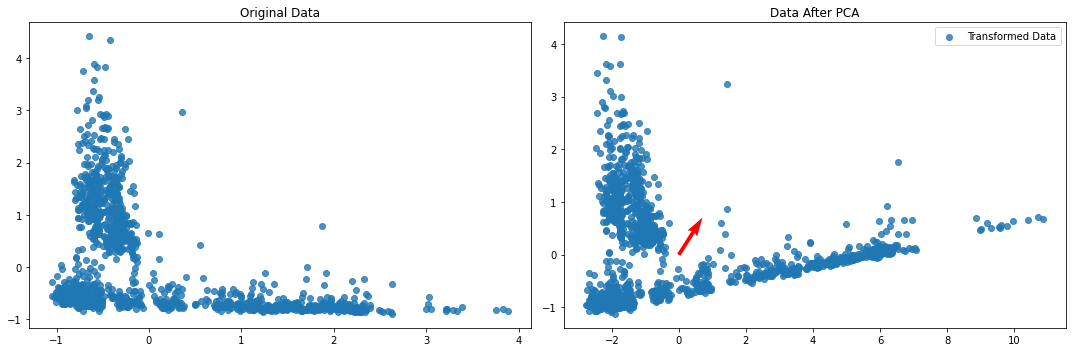

In [124]:
# Create a scatter plot of the first two attributes of the original data
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 4], alpha=0.8, label='Original Data (Attributes 1 and 2)')
plt.title('Original Data')

# Perform PCA
pca = PCA(n_components=2)
newX = pca.fit_transform(X)

# Create a scatter plot of the transformed data after PCA
plt.subplot(1, 2, 2)
plt.scatter(newX[:, 0], newX[:, 1], alpha=0.8, label='Transformed Data')
plt.title('Data After PCA')

# Plotting the principal components (if needed)
for i in range(pca.components_.shape[0]):
    plt.quiver(0, 0, pca.components_[i, 0], pca.components_[i, 1],
               angles='xy', scale_units='xy', scale=0.5, color='r')

plt.legend()
plt.tight_layout()
plt.show()


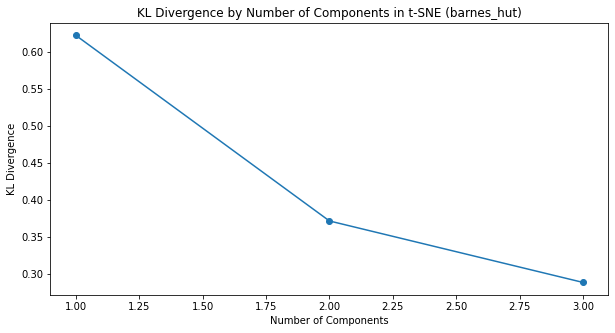

In [120]:
kl_divergence = []

# Iterate over a range of components to fit t-SNE models
for n_components in range(1, min(X.shape[1], 4)):
    tsne = TSNE(n_components=n_components, random_state=42, method='barnes_hut')
    X_tsne = tsne.fit_transform(X)
    kl_divergence.append(tsne.kl_divergence_)

# Plot KL Divergence for each number of components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(kl_divergence) + 1), kl_divergence, marker='o')
plt.title('KL Divergence by Number of Components in t-SNE (barnes_hut)')
plt.xlabel('Number of Components')
plt.ylabel('KL Divergence')
plt.show()

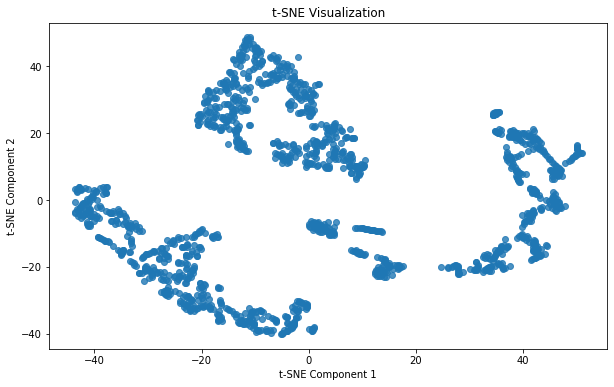

In [121]:
# Create a t-SNE model with 2 components
tsne = TSNE(n_components=2)

# Fit and transform the data
X_tsne = tsne.fit_transform(X)

# Create a scatter plot of the t-SNE-transformed data
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.8)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


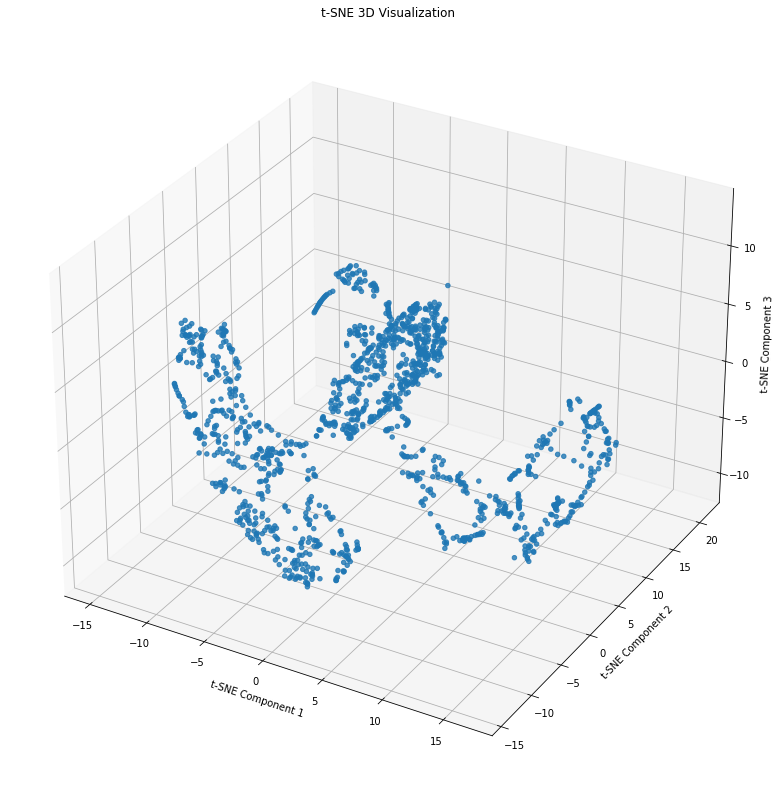

In [126]:
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3)
X_tsne_3d = tsne_3d.fit_transform(X)

fig = plt.figure(figsize=(20, 14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], alpha=0.8)
ax.set_title('t-SNE 3D Visualization')
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
plt.show()


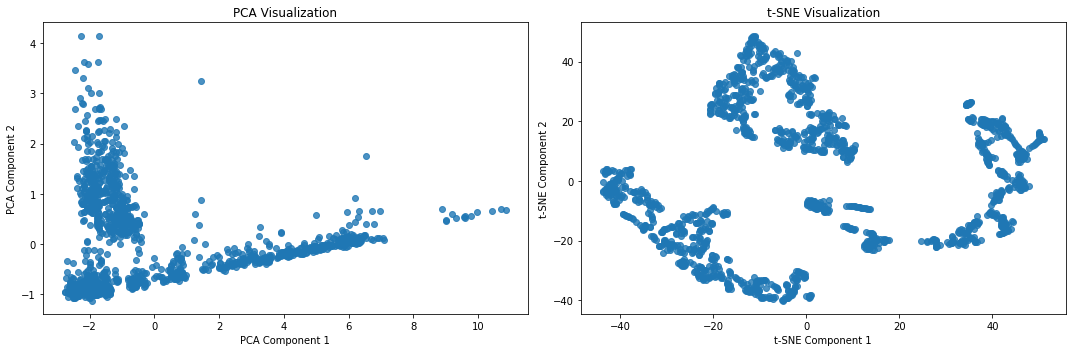

In [123]:
# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Perform t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for PCA
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.8)
axes[0].set_title('PCA Visualization')
axes[0].set_xlabel('PCA Component 1')
axes[0].set_ylabel('PCA Component 2')

# Scatter plot for t-SNE
axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.8)
axes[1].set_title('t-SNE Visualization')
axes[1].set_xlabel('t-SNE Component 1')
axes[1].set_ylabel('t-SNE Component 2')

plt.tight_layout()
plt.show()


---
format:
  html:
    embed-resources: true
    code-fold: true
---

#### Import

In [97]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


#### 4.1.1: Import 

The following code will import the data file into a pandas data-frame

In [98]:
# LOAD THE DATAFRAME
from sklearn.datasets import load_breast_cancer
(x,y) = load_breast_cancer(return_X_y=True,as_frame=True)
df=pd.concat([x,y],axis=1)

# LOOK AT FIRST ROW
print(df.iloc[0])

mean radius                  17.990000
mean texture                 10.380000
mean perimeter              122.800000
mean area                  1001.000000
mean smoothness               0.118400
mean compactness              0.277600
mean concavity                0.300100
mean concave points           0.147100
mean symmetry                 0.241900
mean fractal dimension        0.078710
radius error                  1.095000
texture error                 0.905300
perimeter error               8.589000
area error                  153.400000
smoothness error              0.006399
compactness error             0.049040
concavity error               0.053730
concave points error          0.015870
symmetry error                0.030030
fractal dimension error       0.006193
worst radius                 25.380000
worst texture                17.330000
worst perimeter             184.600000
worst area                 2019.000000
worst smoothness              0.162200
worst compactness        

In [99]:
df = pd.read_csv("../data/modified-data/stock_cluster.csv")
df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted', 'dn', 'mavg', 'up', 'Stock']]

(1431, 11)


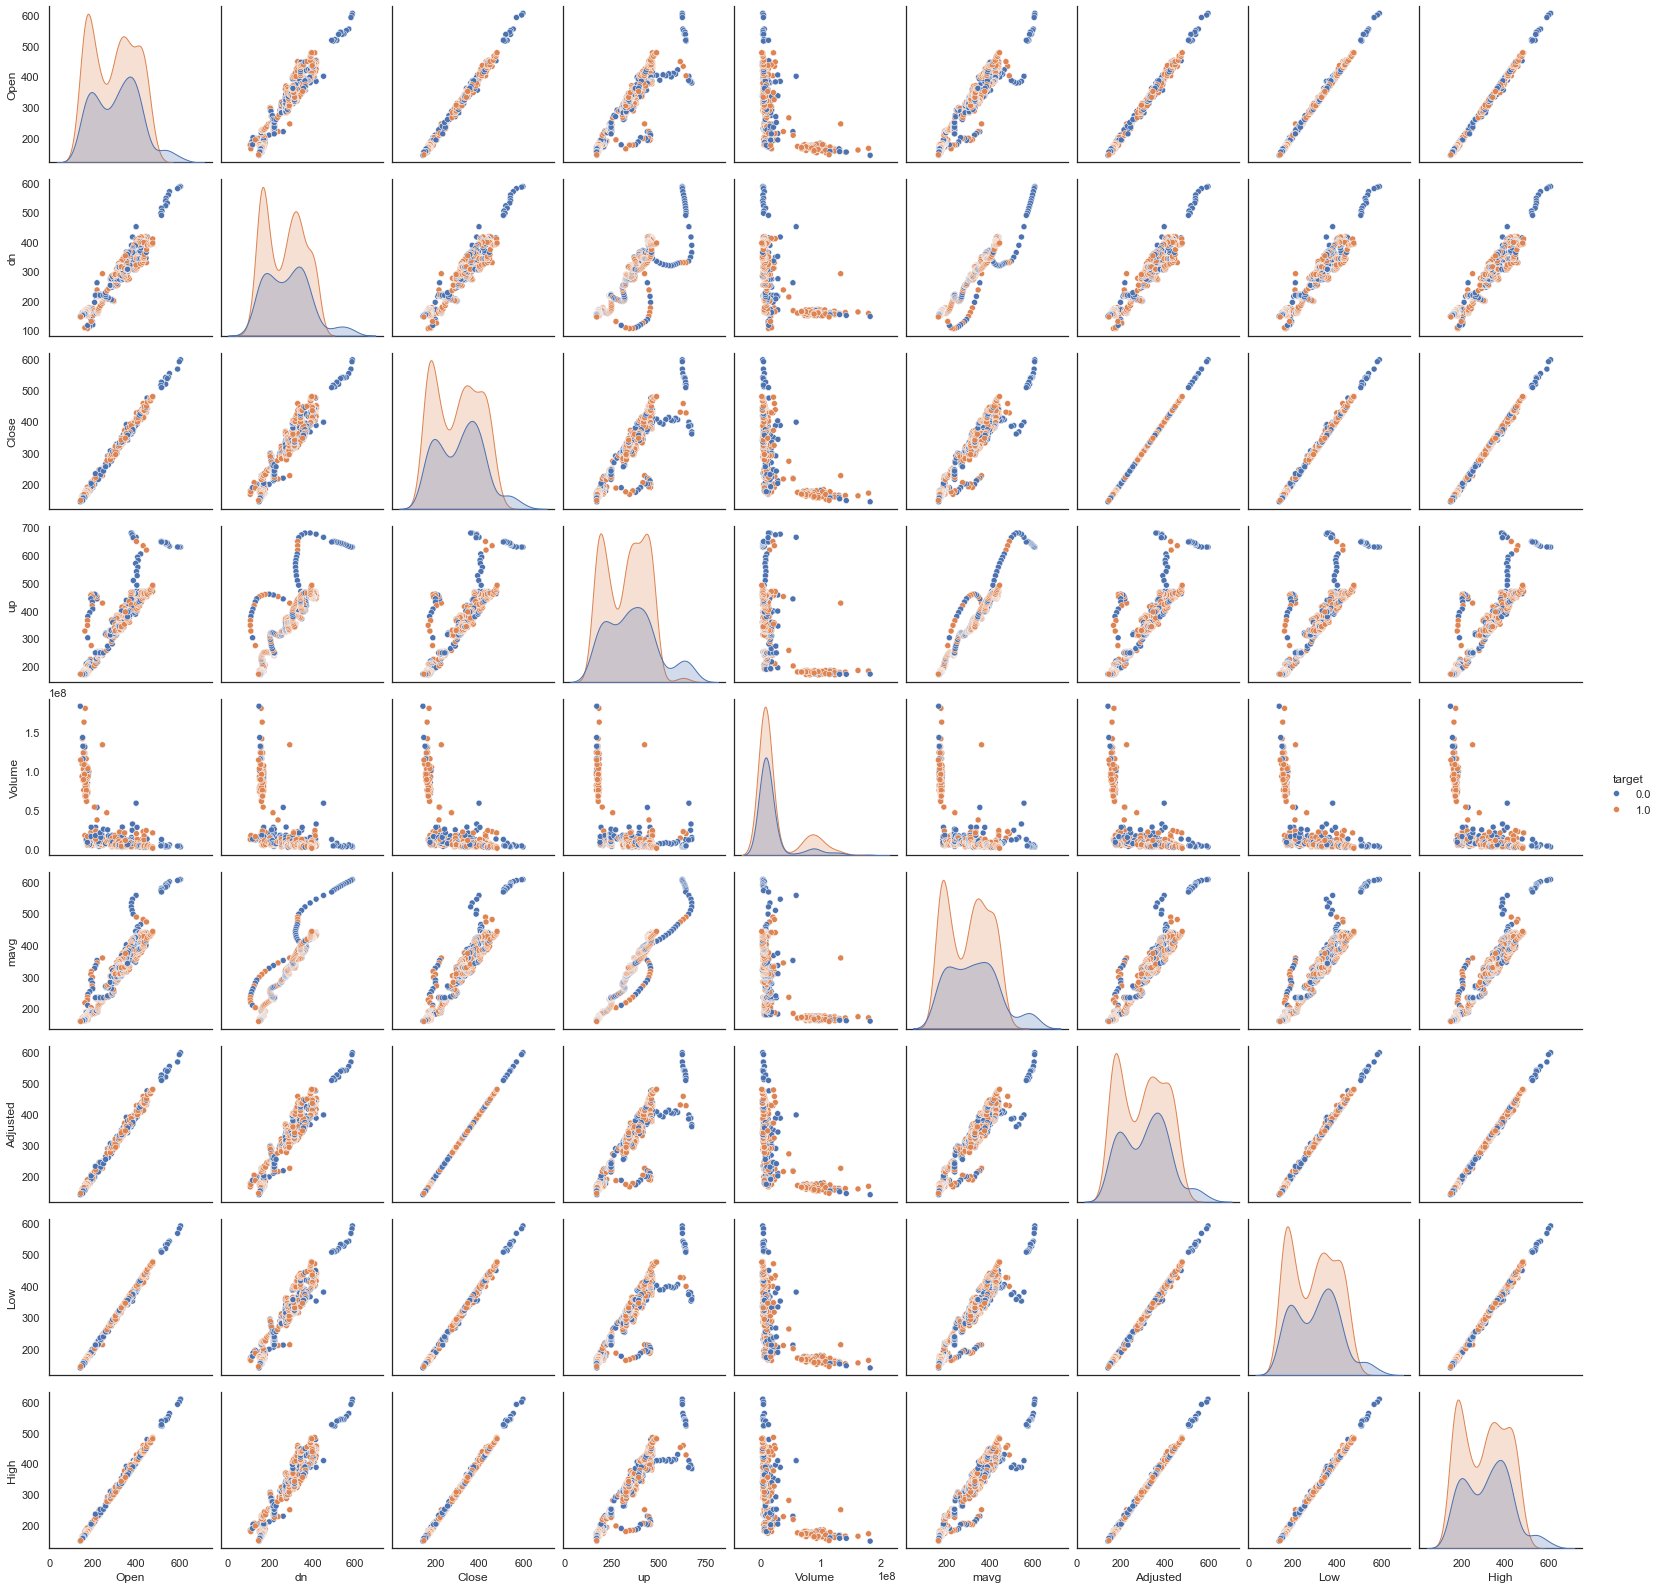

In [100]:
# # RUN THE FOLLOWING CODE TO GENERATE A SEABORN PAIRPLOT 
tmp=pd.concat([df.sample(n=10,axis=1),y],axis=1)
print(tmp.shape)
sns.pairplot(tmp,hue="target", diag_kind='kde')
plt.show()

In [101]:
# Convert the stock to categorical
df['Stock'] = df['Stock'].astype('category')
# Encode the stock as numeric using cat.codes
df['Stock'] = df['Stock'].cat.codes
df.rename(columns={"Stock": 'target'}, inplace=True)

In [102]:
# INSERT CODE TO PRINT ITS SHAPE AND COLUMN NAMES
print(df.shape)
print(df.columns)

(1431, 10)
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Adjusted', 'dn', 'mavg',
       'up', 'target'],
      dtype='object')


#### 4.1.2: Basic data exploration

We will be using y="target" (output target) and all other remaining columns as our X (input feature) matrix. 

Before doing analysis it is always good to "get inside" the data and see what we are working with

In [103]:
#INSERT CODE TO PRINT THE FOLLOWING DATA-FRAME WHICH SUMMARIZES EACH COLUMN 
summary_stats = df.describe().transpose()[['min', 'mean', 'max']]
dtypes = df.dtypes
summary = pd.concat([dtypes, summary_stats], axis=1)
summary.columns = ['dtypes', 'min', 'mean', 'max']
print(summary)

           dtypes           min          mean           max
Open      float64  1.018000e+02  2.090672e+02  6.056100e+02
High      float64  1.045400e+02  2.120809e+02  6.099900e+02
Low       float64  1.012800e+02  2.060704e+02  5.905600e+02
Close     float64  1.019600e+02  2.091259e+02  5.973700e+02
Volume      int64  1.404700e+06  3.198843e+07  1.826020e+08
Adjusted  float64  9.900871e+01  2.076091e+02  5.973700e+02
dn        float64  9.866728e+01  1.920277e+02  5.872915e+02
mavg      float64  1.086962e+02  2.100733e+02  6.072508e+02
up        float64  1.161748e+02  2.281188e+02  6.778163e+02
target       int8  0.000000e+00  1.000000e+00  2.000000e+00


In [104]:
# INSERT CODE TO EXPLORE THE LOAD BALANCE AND COUNT THE NUMBER OF SAMPLES FOR EACH TARGET (THEN PRINT THE RESULT)
target_counts = df['target'].value_counts()

for target, count in target_counts.items():
    print(f"Number of points with target = {target}: {count} {count / len(df)}")

Number of points with target=2: 477 0.3333333333333333
Number of points with target=0: 477 0.3333333333333333
Number of points with target=1: 477 0.3333333333333333


(10, 10)


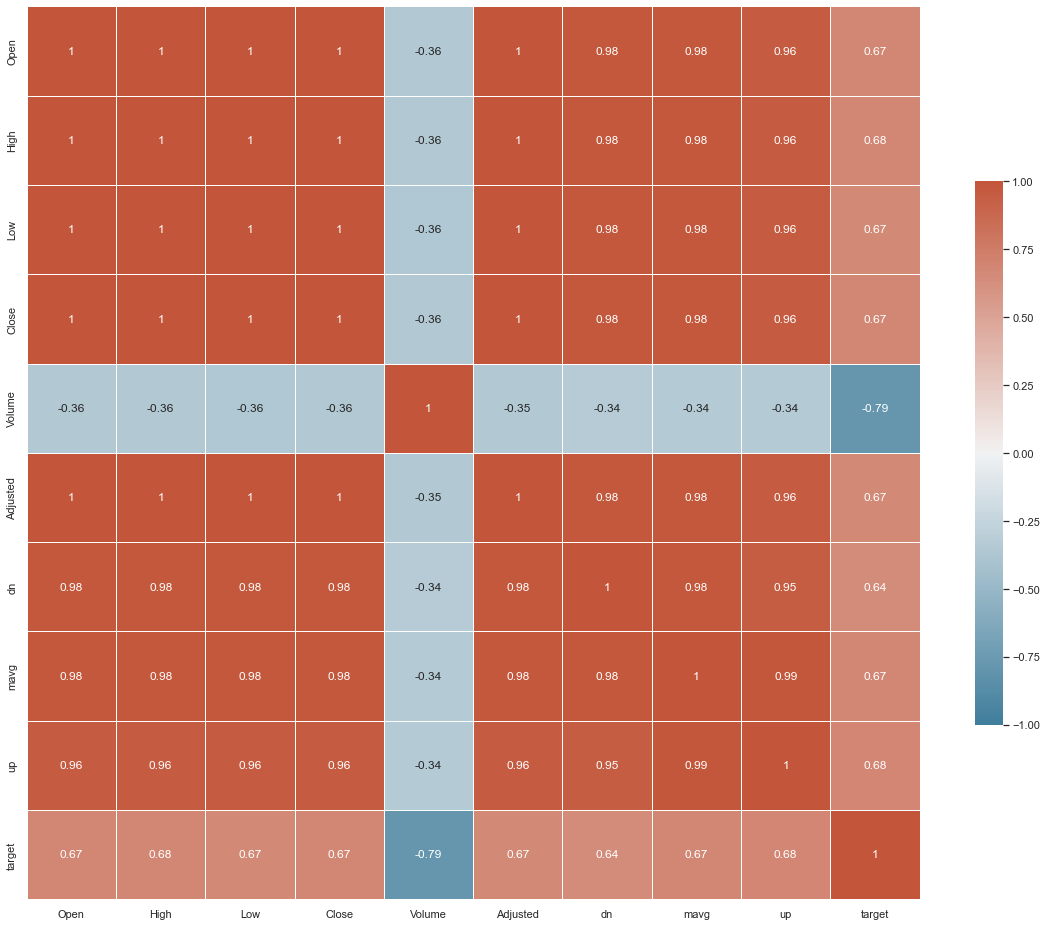

In [105]:
# RUN THE FOLLOWING CODE TO SHOW THE HEAT-MAP FOR THE CORRELATION MATRIX
corr = df.corr();  #print(corr)					#COMPUTE CORRELATION OF FEATER MATRIX
print(corr.shape)
sns.set_theme(style="white")
f, ax = plt.subplots(figsize=(20, 20))  # Set up the matplotlib figure
cmap = sns.diverging_palette(230, 20, as_cmap=True) 	# Generate a custom diverging colormap
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,  annot=True, cmap=cmap, vmin=-1, vmax=1, center=0,
        square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show();

When the dataset is very large then the seaborn pairplot is often very slow. 

However, in this case it can still be useful to look at a subset of the features

 #### 4.1.3  Isolate inputs/output & Split data

In [106]:
# INSERT CODE TO MAKE DATA-FRAMES (or numpy arrays) (X,Y) WHERE Y="target" COLUMN and X="everything else"
X = df.drop(columns=['target']) 
Y = df['target']

#X_array = X.values
#Y_array = Y.values

In [107]:
# INSERT CODE TO PARTITION THE DATASET INTO TRAINING AND TEST SETS
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)


In [108]:
# INSERT CODE, AS A CONSISTENCY CHECK, TO PRINT THE TYPE AND SHAPE OF x_train, x_test, y_train, y_test
print(type(x_train), x_train.shape)
print(type(y_train), y_train.shape)
print(type(x_test), x_test.shape)
print(type(y_test), y_test.shape)

<class 'pandas.core.frame.DataFrame'> (1144, 9)
<class 'pandas.core.series.Series'> (1144,)
<class 'pandas.core.frame.DataFrame'> (287, 9)
<class 'pandas.core.series.Series'> (287,)


 #### 4.1.4  Training the model

In [109]:
## INSERT CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
model = tree.DecisionTreeClassifier()
model = model.fit(x_train, y_train)

 #### 4.1.5  Check the results 

Evaluate the performance of the decision tree model by using the test data. 

In [110]:
# INSERT CODE TO USE THE MODEL TO MAKE PREDICTIONS FOR THE TRAINING AND TEST SET 
yp_train = model.predict(x_train)
yp_test = model.predict(x_test)


Use the following reference to display the confusion matrix.
 [SKlearn Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) will give you the code you need. 

 In the function below, also print the following as part of the function output
 ```
ACCURACY: 0.9035087719298246
NEGATIVE RECALL (Y=0): 0.9574468085106383
NEGATIVE PRECISION (Y=0): 0.8333333333333334
POSITIVE RECALL (Y=1): 0.8656716417910447
POSITIVE PRECISION (Y=1): 0.9666666666666667
[[45  2]
 [ 9 58]]
 ```

In [111]:
#INSERT CODE TO WRITE A FUNCTION def confusion_plot(y_data,y_pred) WHICH GENERATES A CONFUSION MATRIX PLOT AND PRINTS THE INFORMATION ABOVE (see link above for example)
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def confusion_plot(y,yp):
    cm = confusion_matrix(y, yp)
    accuracy = accuracy_score(y, yp)
    precision_0 = precision_score(y, yp, pos_label=0)
    precision_1 = precision_score(y, yp, pos_label=1)
    recall_0 = recall_score(y, yp, pos_label=0)
    recall_1 = recall_score(y, yp, pos_label=1)
    
    print("ACCURACY:", accuracy)
    print("NEGATIVE RECALL (Y=0):", recall_0)
    print("NEGATIVE PRECISION (Y=0):", precision_0)
    print("POSITIVE RECALL (Y=1):", recall_1)
    print("POSITIVE PRECISION (Y=1):", precision_1)
    print(cm)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

In [112]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

def confusion_plot(y, yp):
    cm = confusion_matrix(y, yp)
    accuracy = accuracy_score(y, yp)
    precision_0 = precision_score(y, yp, average=None)[0]
    precision_1 = precision_score(y, yp, average=None)[1]
    precision_2 = precision_score(y, yp, average=None)[2]
    recall_0 = recall_score(y, yp, average=None)[0]
    recall_1 = recall_score(y, yp, average=None)[1]
    recall_2 = recall_score(y, yp, average=None)[2]

    # Set the figure size directly
    plt.figure(figsize=(8, 8))

    print("ACCURACY:", accuracy)
    print("CLASS 0 RECALL:", recall_0)
    print("CLASS 0 PRECISION:", precision_0)
    print("CLASS 1 RECALL:", recall_1)
    print("CLASS 1 PRECISION:", precision_1)
    print("CLASS 2 RECALL:", recall_2)
    print("CLASS 2 PRECISION:", precision_2)
    print(cm)

    # Create ConfusionMatrixDisplay
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.show()

# Example usage:
# confusion_plot(y_true, y_pred)


------TRAINING------
ACCURACY: 1.0
CLASS 0 RECALL: 1.0
CLASS 0 PRECISION: 1.0
CLASS 1 RECALL: 1.0
CLASS 1 PRECISION: 1.0
CLASS 2 RECALL: 1.0
CLASS 2 PRECISION: 1.0
[[383   0   0]
 [  0 377   0]
 [  0   0 384]]


<Figure size 576x576 with 0 Axes>

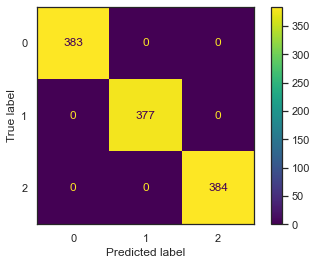

------TEST------
ACCURACY: 0.9930313588850174
CLASS 0 RECALL: 0.9893617021276596
CLASS 0 PRECISION: 0.9893617021276596
CLASS 1 RECALL: 0.99
CLASS 1 PRECISION: 1.0
CLASS 2 RECALL: 1.0
CLASS 2 PRECISION: 0.9893617021276596
[[93  0  1]
 [ 1 99  0]
 [ 0  0 93]]


<Figure size 576x576 with 0 Axes>

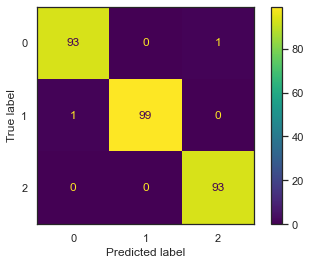

In [113]:
# RUN THE FOLLOWING CODE TO TEST YOUR FUNCTION 
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)


 #### 4.1.6  Visualize the tree

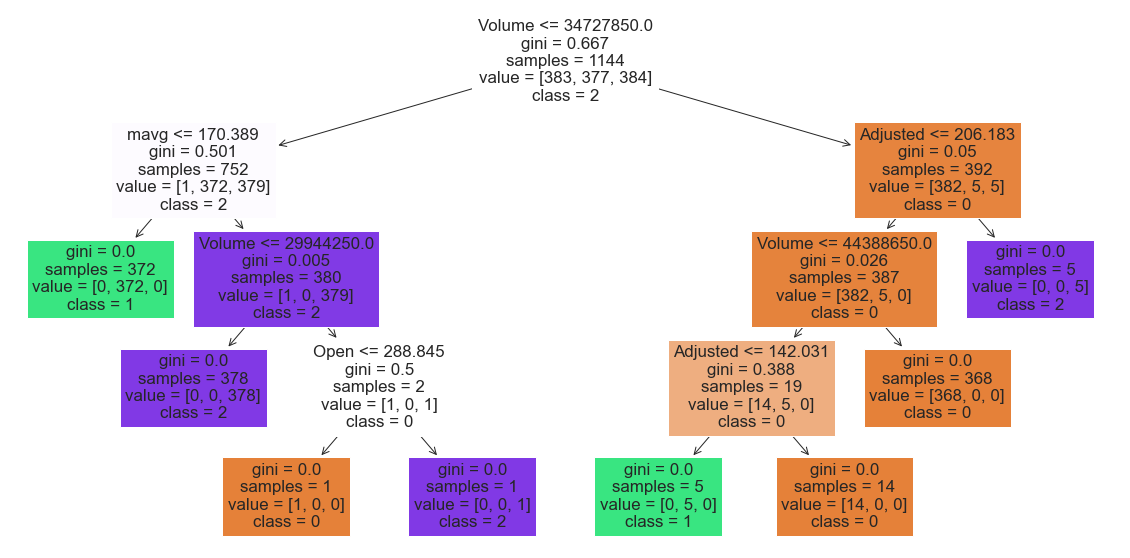

In [114]:
# INSERT CODE TO WRITE A FUNCTION "def plot_tree(model,X,Y)" VISUALIZE THE DECISION TREE (see https://mljar.com/blog/visualize-decision-tree/ for an example)
def plot_tree(model, X, Y):
    plt.figure(figsize=(20, 10))
    tree.plot_tree(model, feature_names=X.columns, class_names=[str(class_label) for class_label in model.classes_], filled=True)
    plt.show()

plot_tree(model, X, Y)

 #### 4.1.6  Hyper-parameter turning

The "max_depth" hyper-parameter lets us control the number of layers in our tree.

Lets iterate over "max_depth" and try to find the set of hyper-parameters with the lowest training AND test error.

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


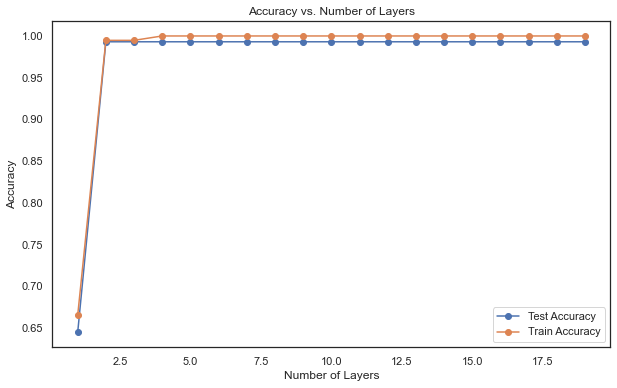

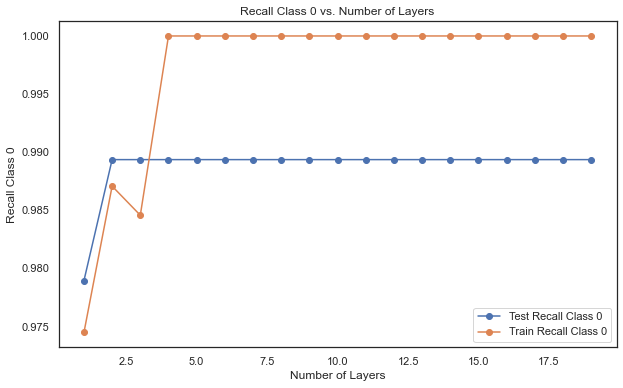

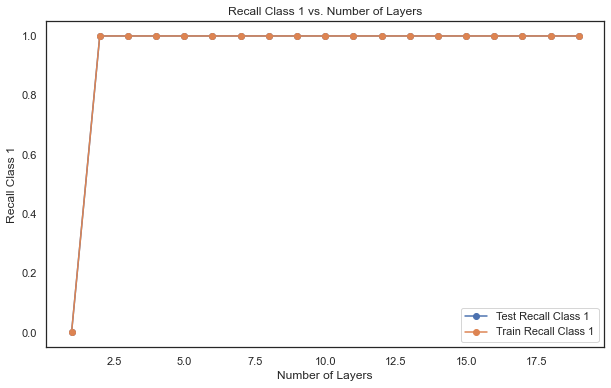

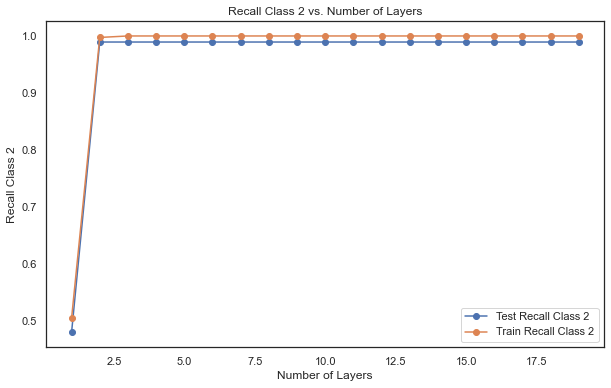

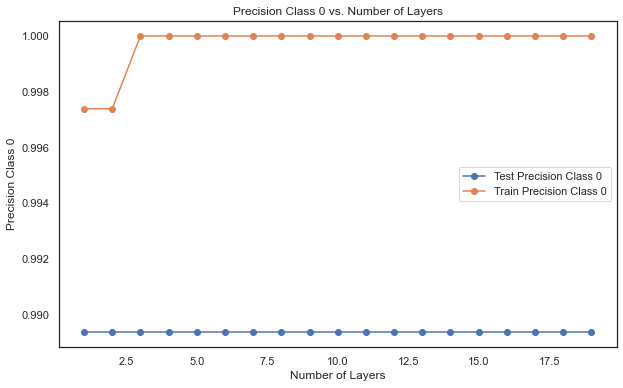

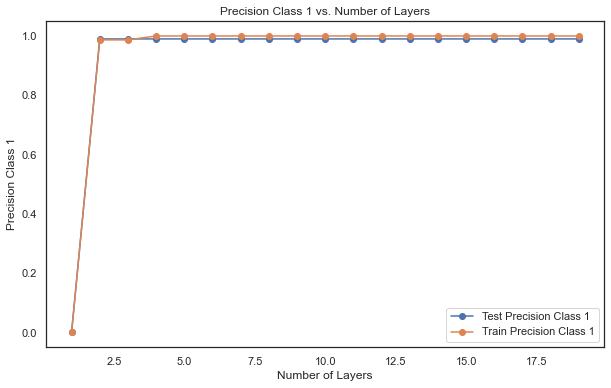

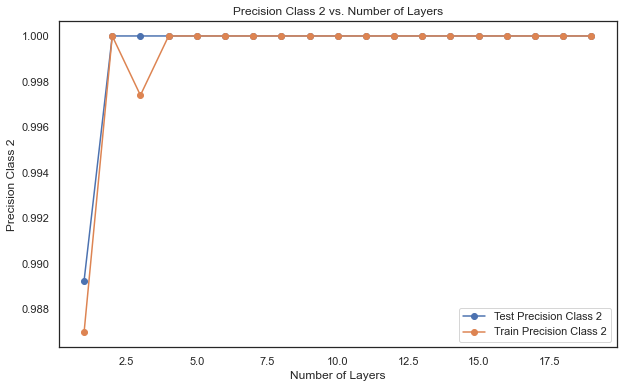

In [148]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

# COMPLETE THE FOLLOWING CODE TO LOOP OVER POSSIBLE HYPER-PARAMETERS VALUES
test_results = []
train_results = []

for num_layer in range(1, 20):
    model = tree.DecisionTreeClassifier(max_depth=num_layer)
    model = model.fit(x_train, y_train)

    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)

    test_results.append([num_layer, accuracy_score(y_test, yp_test), precision_score(y_test, yp_test, average=None),
                         recall_score(y_test, yp_test, average=None)])
    train_results.append([num_layer, accuracy_score(y_train, yp_train), precision_score(y_train, yp_train, average=None),
                          recall_score(y_train, yp_train, average=None)])

# Extract results for plotting
num_layers = [result[0] for result in test_results]

# Accuracy
test_accuracies = [result[1] for result in test_results]
train_accuracies = [result[1] for result in train_results]

# Recall
test_recalls_class_0 = [result[2][0] for result in test_results]
train_recalls_class_0 = [result[2][0] for result in train_results]

test_recalls_class_1 = [result[2][1] for result in test_results]
train_recalls_class_1 = [result[2][1] for result in train_results]

test_recalls_class_2 = [result[2][2] for result in test_results]
train_recalls_class_2 = [result[2][2] for result in train_results]

# Precision
test_precisions_class_0 = [result[3][0] for result in test_results]
train_precisions_class_0 = [result[3][0] for result in train_results]

test_precisions_class_1 = [result[3][1] for result in test_results]
train_precisions_class_1 = [result[3][1] for result in train_results]

test_precisions_class_2 = [result[3][2] for result in test_results]
train_precisions_class_2 = [result[3][2] for result in train_results]

# Accuracy
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_accuracies, 'o-', label='Test Accuracy')
plt.plot(num_layers, train_accuracies, 'o-', label='Train Accuracy')
plt.title('Accuracy vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Recall Class 0
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_recalls_class_0, 'o-', label='Test Recall Class 0')
plt.plot(num_layers, train_recalls_class_0, 'o-', label='Train Recall Class 0')
plt.title('Recall Class 0 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Recall Class 0')
plt.legend()
plt.show()

# Recall Class 1
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_recalls_class_1, 'o-', label='Test Recall Class 1')
plt.plot(num_layers, train_recalls_class_1, 'o-', label='Train Recall Class 1')
plt.title('Recall Class 1 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Recall Class 1')
plt.legend()
plt.show()

# Recall Class 2
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_recalls_class_2, 'o-', label='Test Recall Class 2')
plt.plot(num_layers, train_recalls_class_2, 'o-', label='Train Recall Class 2')
plt.title('Recall Class 2 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Recall Class 2')
plt.legend()
plt.show()

# Precision Class 0
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_precisions_class_0, 'o-', label='Test Precision Class 0')
plt.plot(num_layers, train_precisions_class_0, 'o-', label='Train Precision Class 0')
plt.title('Precision Class 0 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Precision Class 0')
plt.legend()
plt.show()

# Precision Class 1
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_precisions_class_1, 'o-', label='Test Precision Class 1')
plt.plot(num_layers, train_precisions_class_1, 'o-', label='Train Precision Class 1')
plt.title('Precision Class 1 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Precision Class 1')
plt.legend()
plt.show()

# Precision Class 2
plt.figure(figsize=(10,6))
plt.plot(num_layers, test_precisions_class_2, 'o-', label='Test Precision Class 2')
plt.plot(num_layers, train_precisions_class_2, 'o-', label='Train Precision Class 2')
plt.title('Precision Class 2 vs. Number of Layers')
plt.xlabel('Number of Layers')
plt.ylabel('Precision Class 2')
plt.legend()
plt.show()


 #### 4.1.7 Train optimal model 
 
 Re-train the decision tree using the optimal hyper-parameter obtained from the plot above
 

In [126]:
#### COMPLETE THE CODE BELOW TO TRAIN A SKLEARN DECISION TREE MODEL ON x_train,y_train 
from sklearn import tree
model = tree.DecisionTreeClassifier(max_depth=4)
model = model.fit(x_train, y_train)

yp_train=model.predict(x_train)
yp_test=model.predict(x_test)

------TRAINING------
ACCURACY: 1.0
CLASS 0 RECALL: 1.0
CLASS 0 PRECISION: 1.0
CLASS 1 RECALL: 1.0
CLASS 1 PRECISION: 1.0
CLASS 2 RECALL: 1.0
CLASS 2 PRECISION: 1.0
[[383   0   0]
 [  0 377   0]
 [  0   0 384]]


<Figure size 576x576 with 0 Axes>

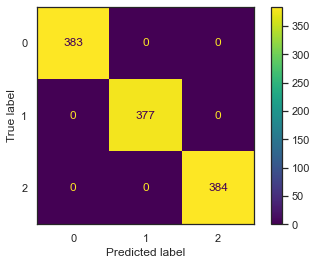

------TEST------
ACCURACY: 0.9930313588850174
CLASS 0 RECALL: 0.9893617021276596
CLASS 0 PRECISION: 0.9893617021276596
CLASS 1 RECALL: 0.99
CLASS 1 PRECISION: 1.0
CLASS 2 RECALL: 1.0
CLASS 2 PRECISION: 0.9893617021276596
[[93  0  1]
 [ 1 99  0]
 [ 0  0 93]]


<Figure size 576x576 with 0 Axes>

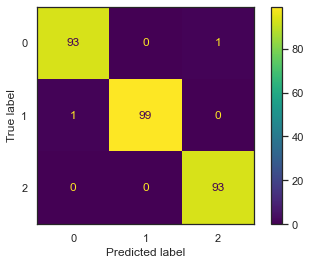

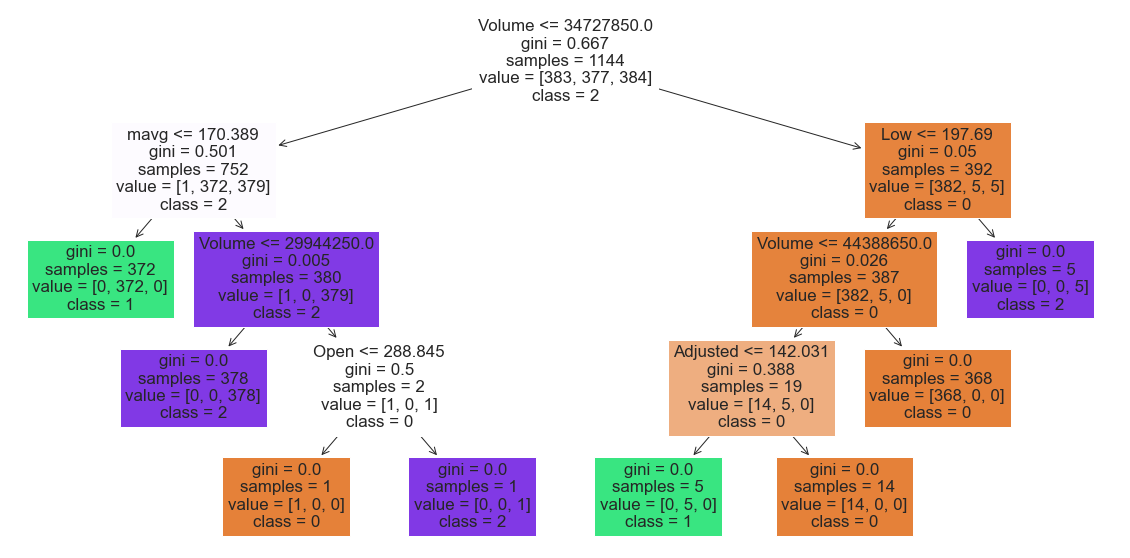

In [127]:
# RUN THE FOLLOWING CODE TO EVALUATE YOUR MODEL
print("------TRAINING------")
confusion_plot(y_train,yp_train)
print("------TEST------")
confusion_plot(y_test,yp_test)

plot_tree(model,X,Y)


In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, min_samples_split=4, min_samples_leaf=3, max_features='log2', max_depth=70)

# Train the model
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Accuracy: 0.9930313588850174
Confusion Matrix:
[[93  0  1]
 [ 1 99  0]
 [ 0  0 93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        94
           1       1.00      0.99      0.99       100
           2       0.99      1.00      0.99        93

    accuracy                           0.99       287
   macro avg       0.99      0.99      0.99       287
weighted avg       0.99      0.99      0.99       287



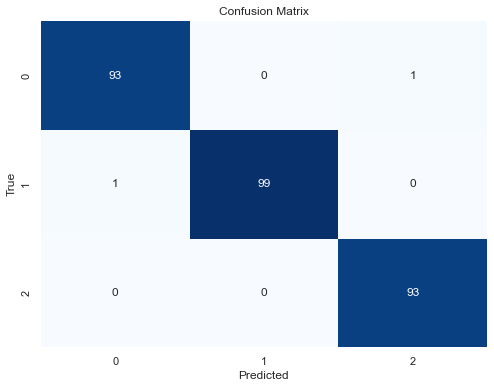

<ipython-input-143-6fd300f0b582>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_names, palette='viridis')


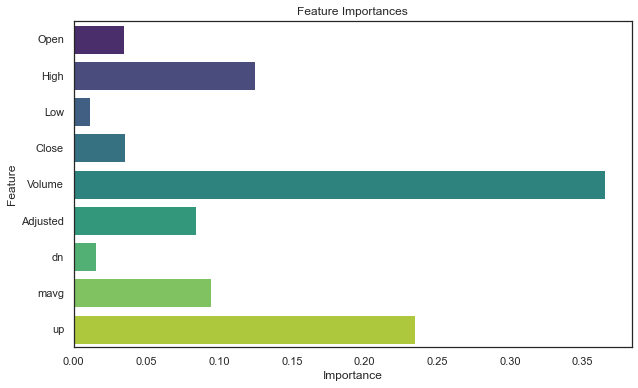

In [143]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot feature importances
feature_importances = rf_classifier.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names, palette='viridis')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
57 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
43 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_con

Best Parameters: {'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 3, 'max_features': 'log2', 'max_depth': 70, 'bootstrap': False}
Test Accuracy: 0.9930313588850174


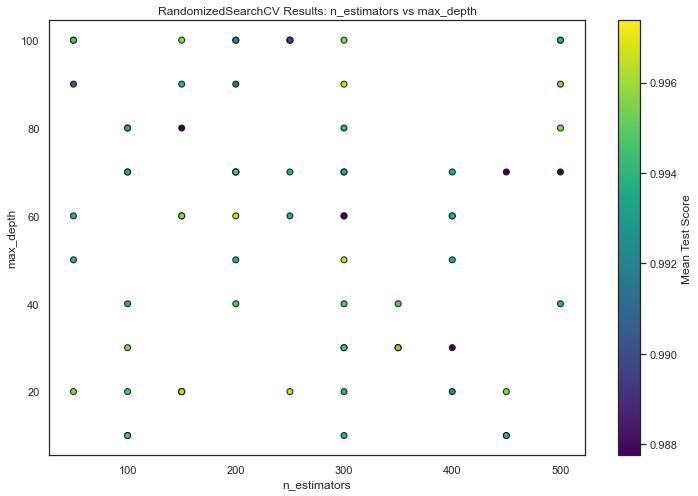

In [144]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter distributions
param_dist = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Create the base model
rf_base = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=rf_base, param_distributions=param_dist,
                                   n_iter=100, cv=3, scoring='accuracy', n_jobs=-1, random_state=42)

# Fit the model to the data
random_search.fit(x_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

# Get the best model
best_rf_model = random_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

# Visualize the effect of two hyperparameters
param1 = 'n_estimators'
param2 = 'max_depth'

# Extract the results from the RandomizedSearchCV
results = random_search.cv_results_
param1_values = results['param_' + param1].data.astype(float)
param2_values = results['param_' + param2].data.astype(float)
mean_test_scores = results['mean_test_score']

# Create a scatter plot
plt.figure(figsize=(12, 8))
sc = plt.scatter(param1_values, param2_values, c=mean_test_scores, cmap='viridis', marker='o', edgecolors='k')
plt.colorbar(sc, label='Mean Test Score')
plt.title(f'RandomizedSearchCV Results: {param1} vs {param2}')
plt.xlabel(param1)
plt.ylabel(param2)
plt.show()


/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/chendong/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_cons

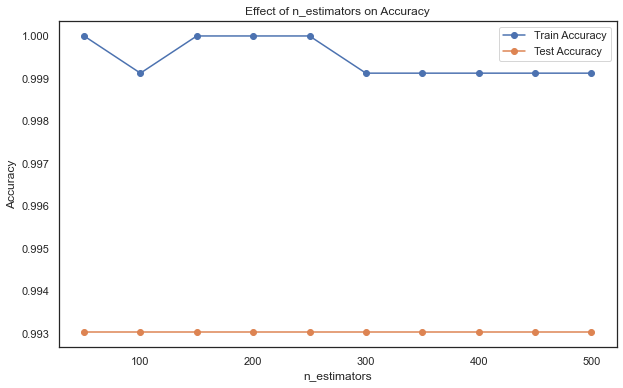

In [145]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define the parameter grid
param_grid = {
    'n_estimators': np.arange(50, 501, 50),
    'max_depth': [None] + list(np.arange(10, 101, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 11),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_grid,
    n_iter=10,  # You can adjust the number of iterations
    scoring='accuracy',
    cv=5,  # You can adjust the number of cross-validation folds
    random_state=42,
    n_jobs=-1  # Use -1 to use all available CPU cores
)

# Fit the RandomizedSearchCV
random_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Initialize the base model with the best hyperparameters
best_rf_model = RandomForestClassifier(**best_params, random_state=42)

# Lists to store results
train_accuracies = []
test_accuracies = []

# Plotting n_estimators over accuracy
plt.figure(figsize=(10, 6))
for n_estimators in param_grid['n_estimators']:
    best_rf_model.n_estimators = n_estimators
    best_rf_model.fit(x_train, y_train)
    
    train_pred = best_rf_model.predict(x_train)
    test_pred = best_rf_model.predict(x_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot points with dots and connect with lines
plt.plot(param_grid['n_estimators'], train_accuracies, 'o-', label='Train Accuracy')
plt.plot(param_grid['n_estimators'], test_accuracies, 'o-', label='Test Accuracy')
plt.title('Effect of n_estimators on Accuracy')
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Similar code can be used for other hyperparameters (max_depth, min_samples_split, min_samples_leaf, max_features)


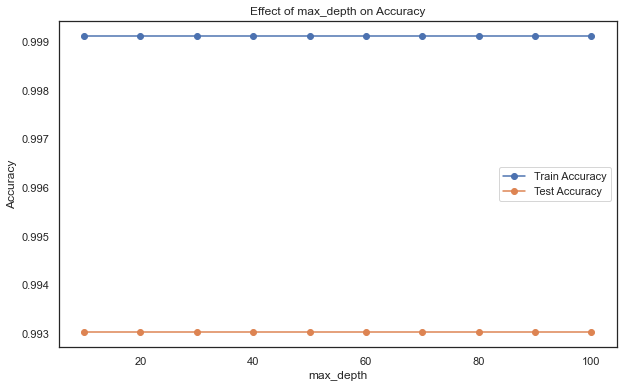

In [138]:
# Lists to store results
train_accuracies = []
test_accuracies = []

# Plotting max_depth over accuracy
plt.figure(figsize=(10, 6))
for max_depth in param_grid['max_depth']:
    best_rf_model.max_depth = max_depth
    best_rf_model.fit(x_train, y_train)
    
    train_pred = best_rf_model.predict(x_train)
    test_pred = best_rf_model.predict(x_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot points with dots and connect with lines
plt.plot(param_grid['max_depth'], train_accuracies, 'o-', label='Train Accuracy')
plt.plot(param_grid['max_depth'], test_accuracies, 'o-', label='Test Accuracy')
plt.title('Effect of max_depth on Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


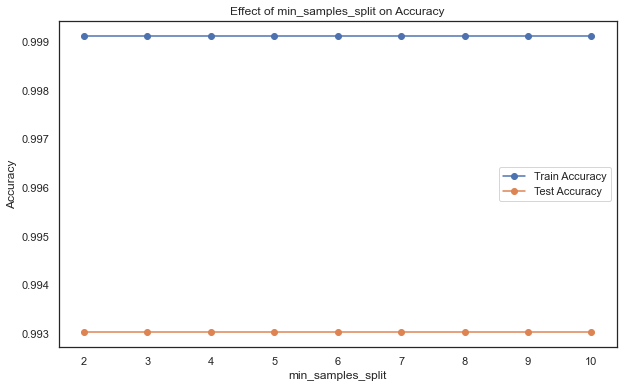

In [139]:
# Lists to store results
train_accuracies = []
test_accuracies = []

# Plotting min_samples_split over accuracy
plt.figure(figsize=(10, 6))
for min_samples_split in param_grid['min_samples_split']:
    best_rf_model.min_samples_split = min_samples_split
    best_rf_model.fit(x_train, y_train)
    
    train_pred = best_rf_model.predict(x_train)
    test_pred = best_rf_model.predict(x_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot points with dots and connect with lines
plt.plot(param_grid['min_samples_split'], train_accuracies, 'o-', label='Train Accuracy')
plt.plot(param_grid['min_samples_split'], test_accuracies, 'o-', label='Test Accuracy')
plt.title('Effect of min_samples_split on Accuracy')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

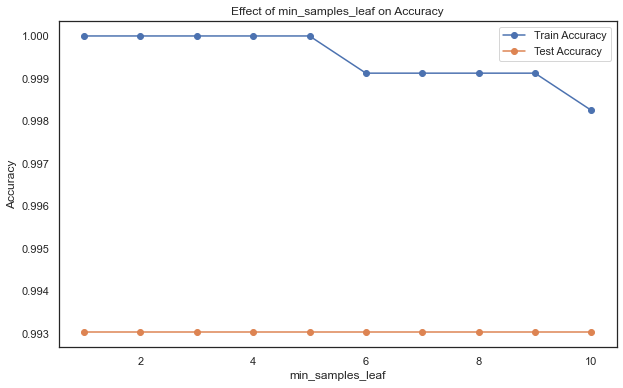

In [140]:
# Lists to store results
train_accuracies = []
test_accuracies = []

# Plotting min_samples_leaf over accuracy
plt.figure(figsize=(10, 6))
for min_samples_leaf in param_grid['min_samples_leaf']:
    best_rf_model.min_samples_leaf = min_samples_leaf
    best_rf_model.fit(x_train, y_train)
    
    train_pred = best_rf_model.predict(x_train)
    test_pred = best_rf_model.predict(x_test)
    
    train_accuracies.append(accuracy_score(y_train, train_pred))
    test_accuracies.append(accuracy_score(y_test, test_pred))

# Plot points with dots and connect with lines
plt.plot(param_grid['min_samples_leaf'], train_accuracies, 'o-', label='Train Accuracy')
plt.plot(param_grid['min_samples_leaf'], test_accuracies, 'o-', label='Test Accuracy')
plt.title('Effect of min_samples_leaf on Accuracy')
plt.xlabel('min_samples_leaf')
plt.ylabel('Accuracy')
plt.legend()
plt.show()